In [37]:
#import pandas and html packages
import pandas as pd
from IPython.display import display, HTML

# Load Energy production dataset
file_path = '/Users/chiranthanyc/Documents/Documents/dissertation/dissertationfiles/energyProductionJanToDec.xlsx'
data = pd.read_excel(file_path)

# Count NaN values
nan_counts_before = data.isna().sum()

# Convert time columns to datetime
data['HourUTC'] = pd.to_datetime(data['HourUTC'])
data['HourDK'] = pd.to_datetime(data['HourDK'])

# Drop any rows with missing MunicipalityNo and with MunicipalityNo == 999
data = data.dropna(subset=['MunicipalityNo'])
data = data[data['MunicipalityNo'] != 999]

# Replace any missing values with 0
data.fillna(0, inplace=True)

# Create temporal features
data['hour'] = data['HourUTC'].dt.hour
data['day'] = data['HourUTC'].dt.day
data['month'] = data['HourUTC'].dt.month

# Remove duplicates records
data.drop_duplicates(inplace=True)

# Count NaN values after processing
nan_counts_after = data.isna().sum()

# Display the missing values count in a DataFrame
missing_values_df_before = pd.DataFrame(nan_counts_before, columns=['Missing Values Before'])
missing_values_df_after = pd.DataFrame(nan_counts_after, columns=['Missing Values After'])

# Concatenate before and after dataframes
missing_values_df = pd.concat([missing_values_df_before, missing_values_df_after], axis=1)

# Display the DataFrame in html format for cleaner display
display(HTML('<h2>Missing Values in Each Column</h2>'))
display(missing_values_df)

# Save the cleaned dataset for further refinement
cleaned_file_path = '/Users/chiranthanyc/Documents/Documents/dissertation/dissertationfiles/cleaned_data.xlsx'
data.to_excel(cleaned_file_path, index=False)

print(f"Cleaned data saved to {cleaned_file_path}")


Missing Values Before  Missing Values After
HourUTC                                    0.0                     0
HourDK                                     0.0                     0
MunicipalityNo                            72.0                     0
SolarMWh                                8737.0                     0
OffshoreWindLt100MW_MWh               795830.0                     0
OffshoreWindGe100MW_MWh               818291.0                     0
OnshoreWindMWh                            16.0                     0
ThermalPowerMWh                       119814.0                     0
hour                                       NaN                     0
day                                        NaN                     0
month                                      NaN                     0

Cleaned data saved to /Users/chiranthanyc/Documents/Documents/dissertation/dissertationfiles/cleaned_data.xlsx


In [40]:
# Import pandas library
import pandas as pd

# import new cleaned file
file_path = '/Users/chiranthanyc/Documents/Documents/dissertation/dissertationfiles/cleaned_data.xlsx'

# Load the imported file
data = pd.read_excel(file_path)

# Convert 'HourDK' to datetime format
data['HourDK'] = pd.to_datetime(data['HourDK'])

# Extract the date from 'HourDK' and create a new 'Date' column
data['Date'] = data['HourDK'].dt.date

# Drop the 'HourUTC' column as HourDk is enough 
data = data.drop(columns=['HourUTC'])

# Group by 'MunicipalityNo' and 'Date' and sum energy production columns
daily_data_dk = data.groupby(['MunicipalityNo', 'Date']).agg({
    'SolarMWh': 'sum',
    'OffshoreWindLt100MW_MWh': 'sum',
    'OffshoreWindGe100MW_MWh': 'sum',
    'OnshoreWindMWh': 'sum',
    'ThermalPowerMWh': 'sum'
}).reset_index()

# define save path
output_file_path = '/Users/chiranthanyc/Documents/Documents/dissertation/dissertationfiles/daywiseProduction.xlsx'

# Save new excel file
daily_data_dk.to_excel(output_file_path, index=False)

# diplay the path for confirmation
output_file_path


'/Users/chiranthanyc/Documents/Documents/dissertation/dissertationfiles/daywiseProduction.xlsx'

In [41]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt

# Load the daywise energy production data
file_path = '/Users/chiranthanyc/Documents/Documents/dissertation/dissertationfiles/daywiseProduction.xlsx'
data = pd.read_excel(file_path)

# Identify municipalities with active wind energy production 
wind_columns = ['OnshoreWindMWh', 'OffshoreWindLt100MW_MWh', 'OffshoreWindGe100MW_MWh']
data['TotalWindProduction'] = data[wind_columns].sum(axis=1)

# Drop rows where total wind energy production is equal to 0
data_with_wind = data[data['TotalWindProduction'] > 0].copy()

# Save the new file
output_file_path = '/Users/chiranthanyc/Documents/Documents/dissertation/dissertationfiles/energyProdMun.xlsx'
data_with_wind.to_excel(output_file_path, index=False)


Aggregated Wind Production Data:
   MunicipalityNo  OnshoreWindMWh  OffshoreWindLt100MW_MWh  \
0             101    20339.005389               74933.3659   
1             167     3278.296398               34650.7916   
2             169     1136.281397                   0.0000   
3             183        2.899580                   0.0000   
4             201     2226.035590                   0.0000   

   OffshoreWindGe100MW_MWh  
0                1253.4965  
1                   0.0000  
2                   0.0000  
3                   0.0000  
4                   0.0000  
Melted Wind Production Data:
   MunicipalityNo        WindType  ProductionMWh
0             101  OnshoreWindMWh   20339.005389
1             167  OnshoreWindMWh    3278.296398
2             169  OnshoreWindMWh    1136.281397
3             183  OnshoreWindMWh       2.899580
4             201  OnshoreWindMWh    2226.035590
Summary Statistics of ProductionMWh:
count    2.430000e+02
mean     6.211328e+04
std      1.80151

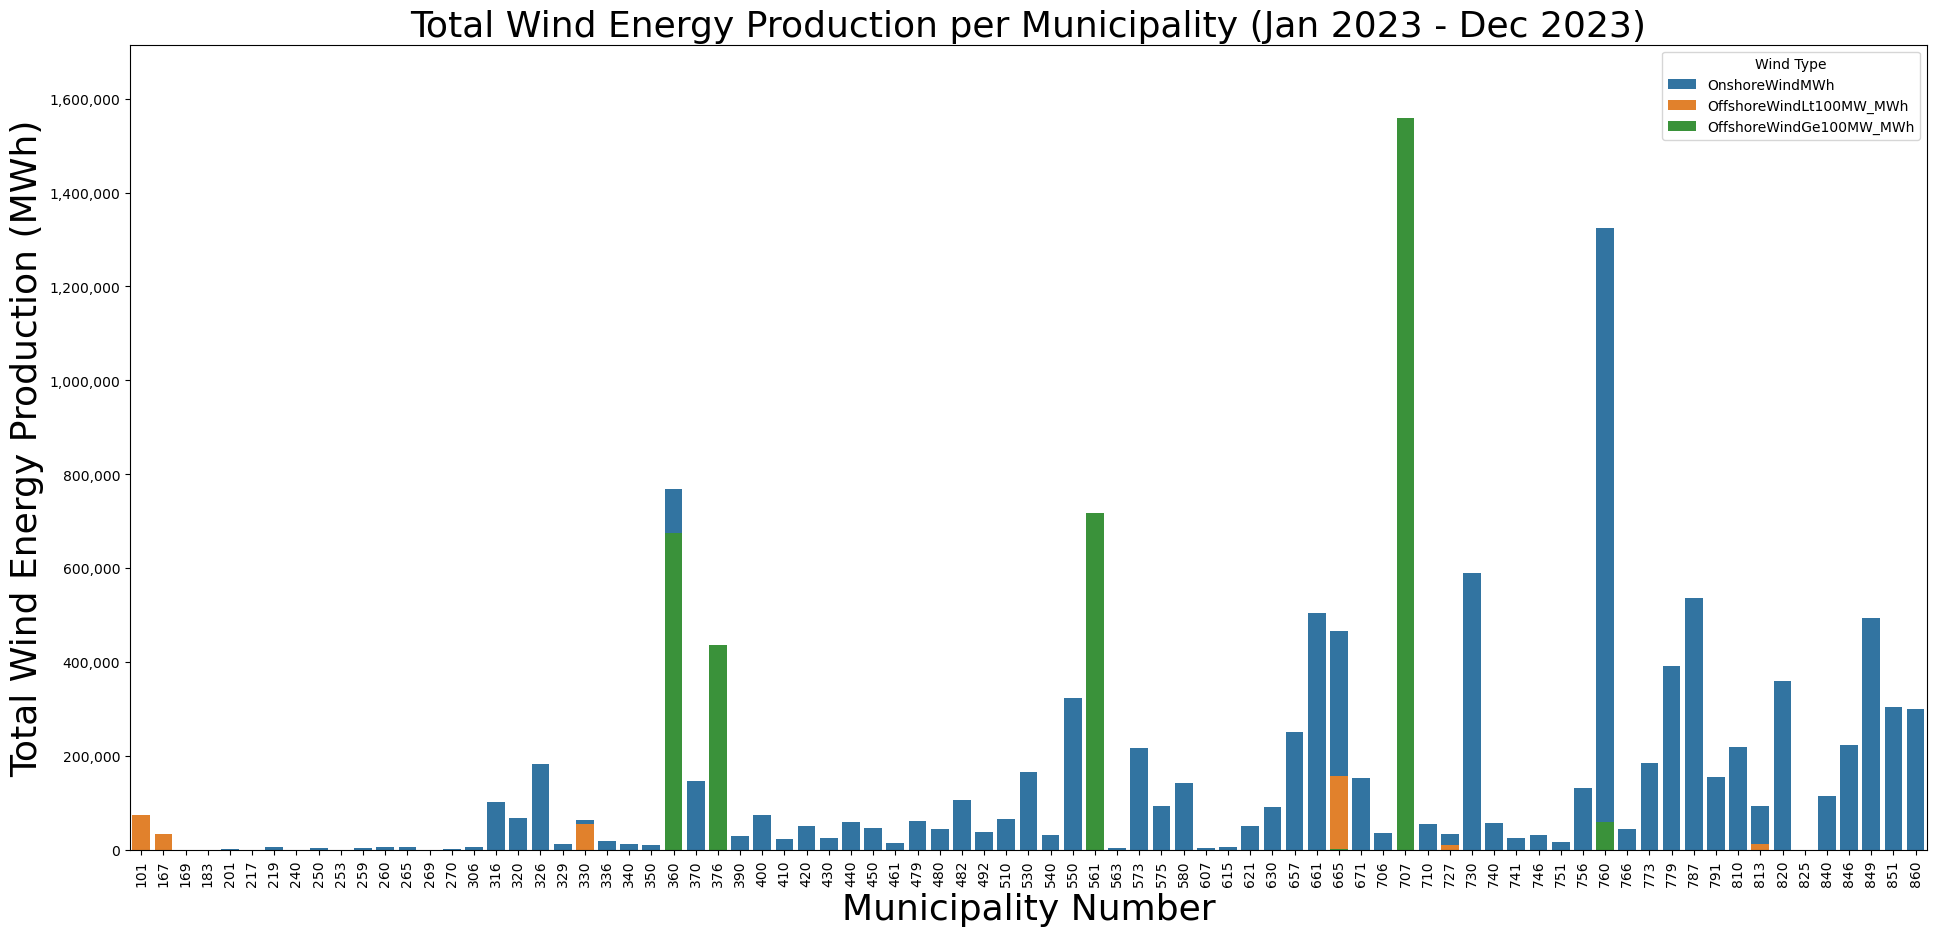

In [42]:
#import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Load the new file
file_path = '/Users/chiranthanyc/Documents/Documents/dissertation/dissertationfiles/energyProdMun.xlsx'
new_data = pd.read_excel(file_path)

# Define wind energy production attributes
wind_columns = ['OnshoreWindMWh', 'OffshoreWindLt100MW_MWh', 'OffshoreWindGe100MW_MWh']

# sum wind energy production data by municipality
wind_production_agg = new_data.groupby('MunicipalityNo')[wind_columns].sum().reset_index()

# print the summed values
print("Aggregated Wind Production Data:")
print(wind_production_agg.head())

# Melt the DataFrame for seaborn
wind_production_melted = pd.melt(wind_production_agg, id_vars=['MunicipalityNo'], value_vars=wind_columns,
                                 var_name='WindType', value_name='ProductionMWh')

# Inspect the melted data
print("Melted Wind Production Data:")
print(wind_production_melted.head())

# Check for pottential issues
print("Summary Statistics of ProductionMWh:")
print(wind_production_melted['ProductionMWh'].describe())

# format y-axis
def real_values(x, pos):
    return f'{int(x):,}'

formatter = FuncFormatter(real_values)

# Create a figure
plt.figure(figsize=(20, 10))

# plot a seaborn bar plot
sns.barplot(x='MunicipalityNo', y='ProductionMWh', hue='WindType', data=wind_production_melted, dodge=False)

# labels and titles
plt.xlabel('Municipality Number', fontsize=26)
plt.ylabel('Total Wind Energy Production (MWh)', fontsize=26)
plt.title('Total Wind Energy Production per Municipality (Jan 2023 - Dec 2023)', fontsize=26)
plt.xticks(rotation=90)

# format y axis
plt.gca().yaxis.set_major_formatter(formatter)

# add limit for y axis
plt.ylim(0, wind_production_melted['ProductionMWh'].max() * 1.1)

# Add legend
plt.legend(title='Wind Type')

# layout to prevent overlapping
plt.tight_layout(pad=3.0)

# Save energy production image
output_image_path = '/Users/chiranthanyc/Documents/Documents/dissertation/dissertationfiles/energy_production_per_municipality.png'
plt.savefig(output_image_path, dpi=300)

# display the plot
plt.show()


In [3]:
#import pandas
import pandas as pd

# Load list of municipalities
file_path_municipalities = '/Users/chiranthanyc/Documents/Documents/dissertation/dissertationfiles/listofmunicipalities.xlsx'
municipality_list_df = pd.read_excel(file_path_municipalities)

# set index to 1
municipality_list_df.index = municipality_list_df.index + 1

# split municipality into 2 parts
rows_per_split = len(municipality_list_df) // 2  # 98 records, split into 4 groups

# Split the DataFrame into smaller chunks
chunks = [municipality_list_df.iloc[i:i + rows_per_split] for i in range(0, len(municipality_list_df), rows_per_split)]

# Print chunks
for i, chunk in enumerate(chunks, start=1):
    print(f"Chunk {i}:\n")
    print(chunk)
    print("\n" + "="*50 + "\n")


Chunk 1:

    MunicipalityNo       Municipality                   Administrative center
1              101         Copenhagen                              Copenhagen
2              751             Aarhus                                  Aarhus
3              851            Aalborg                                 Aalborg
4              461             Odense                                  Odense
5              561            Esbjerg                                 Esbjerg
6              630              Vejle                                   Vejle
7              147      Frederiksberg                           Frederiksberg
8              730            Randers                                 Randers
9              791             Viborg                                  Viborg
10             621            Kolding                                 Kolding
11             740          Silkeborg                               Silkeborg
12             657            Herning                 

Number of municipalities with wind energy production: 81
List of municipalities with wind energy production: [101, 167, 169, 183, 201, 217, 219, 240, 250, 253, 259, 260, 265, 269, 270, 306, 316, 320, 326, 329, 330, 336, 340, 350, 360, 370, 376, 390, 400, 410, 420, 430, 440, 450, 461, 479, 480, 482, 492, 510, 530, 540, 550, 561, 563, 573, 575, 580, 607, 615, 621, 630, 657, 661, 665, 671, 706, 707, 710, 727, 730, 740, 741, 746, 751, 756, 760, 766, 773, 779, 787, 791, 810, 813, 820, 825, 840, 846, 849, 851, 860]


<Figure size 1400x700 with 0 Axes>

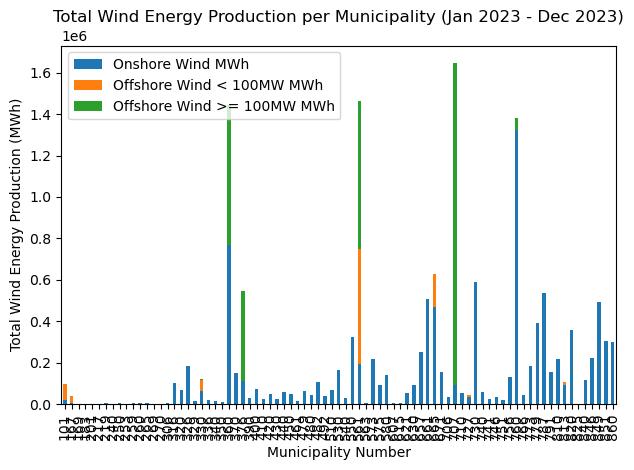

Columns in municipality_list_df: Index(['MunicipalityNo', 'Municipality', 'Administrative center'], dtype='object')
    MunicipalityNo   Municipality Administrative center
0              101     Copenhagen            Copenhagen
1              167       Hvidovre              Hvidovre
2              169  Høje-Taastrup              Taastrup
3              183          Ishøj                 Ishøj
4              201        Allerød              Lillerød
..             ...            ...                   ...
76             840         Rebild              Støvring
77             846  Mariagerfjord     Hobro and Hadsund
78             849     Jammerbugt               Aabybro
79             851        Aalborg               Aalborg
80             860       Hjørring              Hjørring

[81 rows x 3 columns]
Municipalities with windmills: ['Copenhagen', 'Hvidovre', 'Høje-Taastrup', 'Ishøj', 'Allerød', 'Helsingør', 'Hillerød', 'Egedal', 'Frederikssund', 'Greve', 'Køge', 'Halsnæs', 'Roskilde', 'S

In [43]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = '/Users/chiranthanyc/Documents/Documents/dissertation/dissertationfiles/energyProdMun.xlsx'
data = pd.read_excel(file_path)

# Identify municipalities with energy production data
wind_columns = ['OnshoreWindMWh', 'OffshoreWindLt100MW_MWh', 'OffshoreWindGe100MW_MWh']
data['HasWindProduction'] = data[wind_columns].sum(axis=1) > 0

# get unique municipalities with wind energy produciton
municipalities_with_wind = data[data['HasWindProduction']]['MunicipalityNo'].unique()

# print the results
print(f"Number of municipalities with wind energy production: {len(municipalities_with_wind)}")
print("List of municipalities with wind energy production:", municipalities_with_wind.tolist())

# sum wind energy producntion columns by municipality
wind_production_agg = data[data['HasWindProduction']].groupby('MunicipalityNo')[wind_columns].sum()

# Plot the wind energy production for every municipality
plt.figure(figsize=(14, 7))
wind_production_agg.plot(kind='bar', stacked=True)
plt.xlabel('Municipality Number')
plt.ylabel('Total Wind Energy Production (MWh)')
plt.title('Total Wind Energy Production per Municipality (Jan 2023 - Dec 2023)')
plt.legend(['Onshore Wind MWh', 'Offshore Wind < 100MW MWh', 'Offshore Wind >= 100MW MWh'])
plt.tight_layout()
plt.show()

# load list of municipalities
file_path_municipalities = '/Users/chiranthanyc/Documents/Documents/dissertation/dissertationfiles/listofmunicipalities.xlsx'
municipality_list_df = pd.read_excel(file_path_municipalities)

# Rename columns for merging with another file
municipality_list_df = municipality_list_df.rename(columns={"Municipality code": "MunicipalityNo"})

# Display the column names to confirm correct naming
print("Columns in municipality_list_df:", municipality_list_df.columns)

#merge the datasets
if 'MunicipalityNo' in municipality_list_df.columns:
    municipalities_with_wind_df = pd.DataFrame(municipalities_with_wind, columns=['MunicipalityNo'])
    merged_df = pd.merge(municipalities_with_wind_df, municipality_list_df, on='MunicipalityNo', how='inner')
    
    # Display the new merged file
    print(merged_df)
    
    # get names of municipalities with wind energy produciton
    municipalities_with_windmills = merged_df['Municipality'].tolist()
    print("Municipalities with windmills:", municipalities_with_windmills)
else:
    print("Column 'MunicipalityNo' not found in municipality_list_df.")


Saving file to: /Users/chiranthanyc/Documents/Documents/dissertation/dissertationfiles/coordinates.csv
Coordinates file found. Reading from file...
Cluster centroids (latitude, longitude):
Cluster 1: Latitude: 55.27310523333333, Longitude: 10.590313666666667
Cluster 2: Latitude: 56.3264582, Longitude: 9.31836302
Cluster 3: Latitude: 55.29590117, Longitude: 11.70587462
Cluster 4: Latitude: 55.43028753, Longitude: 9.68602507
Cluster 5: Latitude: 55.5207748, Longitude: 8.717072571428572
Cluster 6: Latitude: 57.1738173625, Longitude: 10.0836117625
Cluster 7: Latitude: 56.685324214285714, Longitude: 8.659775742857143
Cluster 8: Latitude: 55.1431224, Longitude: 14.9226297
Cluster 9: Latitude: 55.740922175, Longitude: 12.25622731875
Cluster 10: Latitude: 56.1956331875, Longitude: 10.2759500875


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


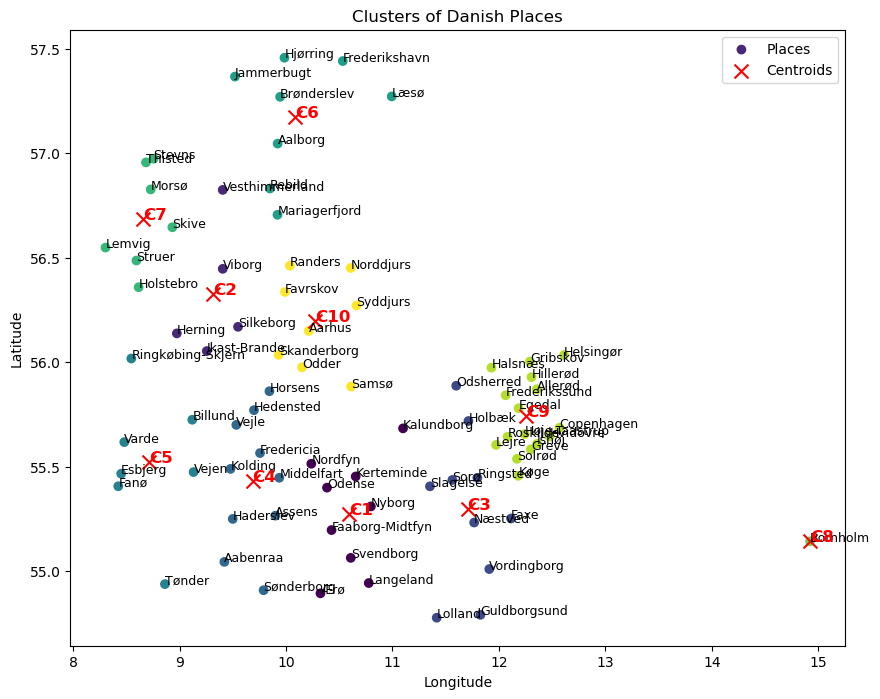

Clusters saved to /Users/chiranthanyc/Documents/Documents/dissertation/dissertationfiles/clusters.csv


In [44]:
#import packages
import os
import time
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from opencage.geocoder import OpenCageGeocode

#get opencage api from - https://opencagedata.com/ 
api_key = 'replace with opencage api'
geocoder = OpenCageGeocode(api_key)

# List of places for easy computation 
places = ['Herning', 'Hillerød', 'Odder', 'Hvidovre', 'Allerød', 'Horsens', 'Mariagerfjord', 'Frederikssund', 'Nyborg', 'Billund', 'Ikast-Brande', 'Rebild', 'Vejle', 'Hjørring', 'Silkeborg', 'Jammerbugt', 'Vesthimmerland', 'Frederikshavn', 'Køge', 'Faxe', 'Lejre', 'Tønder', 'Guldborgsund', 'Aabenraa', 'Stevns', 'Sønderborg', 'Kolding', 'Kerteminde', 'Norddjurs', 'Ringsted', 'Greve', 'Hedensted', 'Skive', 'Randers', 'Halsnæs', 'Kalundborg', 'Aarhus', 'Helsingør', 'Morsø', 'Egedal', 'Syddjurs', 'Brønderslev', 'Vejen', 'Odense', 'Holbæk', 'Esbjerg', 'Thisted', 'Holstebro', 'Bornholm', 'Faaborg-Midtfyn', 'Svendborg', 'Copenhagen', 'Slagelse', 'Næstved', 'Assens', 'Roskilde', 'Skanderborg', 'Aalborg', 'Ringkøbing-Skjern', 'Lemvig', 'Solrød', 'Favrskov', 'Fredericia', 'Lolland', 'Nordfyn', 'Gribskov', 'Ærø', 'Sorø', 'Middelfart', 'Vordingborg', 'Odsherred', 'Viborg', 'Haderslev', 'Varde', 'Struer', 'Samsø', 'Fanø', 'Langeland', 'Læsø', 'Høje-Taastrup', 'Ishøj']

# local path to save coordinates file
save_directory = '/Users/chiranthanyc/Documents/Documents/dissertation/dissertationfiles/'
os.makedirs(save_directory, exist_ok=True)  # Create the directory if it doesn't exist
coordinates_file = os.path.join(save_directory, 'coordinates.csv')
clusters_file = os.path.join(save_directory, 'clusters.csv')
print(f'Saving file to: {coordinates_file}')

# Function to get coordinates from OpenCage
def get_coordinates(place):
    query = f'{place}, Denmark'
    result = geocoder.geocode(query)
    if result and len(result):
        return result[0]['geometry']['lat'], result[0]['geometry']['lng']
    return None, None

# check if coordinate file exists in local
if os.path.exists(coordinates_file):
    print('Coordinates file found. Reading from file...')
    # Read coordinates from file
    df = pd.read_csv(coordinates_file)
else:
    print('Coordinates file not found. Fetching data...')
    # get coordinated from opencage 
    coordinates = []
    for place in places:
        lat, lon = get_coordinates(place)
        if lat is not None and lon is not None:
            coordinates.append((place, lat, lon))
        time.sleep(1)  # Delay to respect rate limiting

    # Create DataFrame
    df = pd.DataFrame(coordinates, columns=['Place', 'Latitude', 'Longitude'])
    print(df)

    # Save the coordinates file
    df.to_csv(coordinates_file, index=False)
    print(f'Coordinates saved to {coordinates_file}')

# Perform K-means clustering to get 10 clusters 
kmeans = KMeans(n_clusters=10, random_state=42)  # You can change the number of clusters
df['Cluster'] = kmeans.fit_predict(df[['Latitude', 'Longitude']])
df['Cluster'] += 1  # To make clusters 1-10 instead of 0-9
centroids = kmeans.cluster_centers_

# Print centroids
print("Cluster centroids (latitude, longitude):")
for i, centroid in enumerate(centroids):
    print(f"Cluster {i+1}: Latitude: {centroid[0]}, Longitude: {centroid[1]}")

# Plot the clusters and centroids
plt.figure(figsize=(10, 8))
plt.scatter(df['Longitude'], df['Latitude'], c=df['Cluster'], cmap='viridis', marker='o', label='Places')
plt.scatter(centroids[:, 1], centroids[:, 0], c='red', marker='x', s=100, label='Centroids')  # Centroids
for i in range(df.shape[0]):
    plt.text(df['Longitude'][i], df['Latitude'][i], df['Place'][i], fontsize=9)
for i, centroid in enumerate(centroids):
    plt.text(centroid[1], centroid[0], f'C{i+1}', fontsize=12, fontweight='bold', color='red')
plt.title('Clusters of Danish Places')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

# Save clusters to CSV file
df = df.sort_values(by=['Cluster', 'Place'])
df.to_csv(clusters_file, index=False)
print(f'Clusters saved to {clusters_file}')


In [45]:
#import pandas
import pandas as pd

# Load the clusters file
clusters_df = pd.read_csv('/Users/chiranthanyc/Documents/Documents/dissertation/dissertationfiles/clusters.csv')

# Load listofmunicipalities file
municipalities_df = pd.read_excel('/Users/chiranthanyc/Documents/Documents/dissertation/dissertationfiles/listofmunicipalities.xlsx')

# Merge two files with municipality
merged_df = pd.merge(clusters_df, municipalities_df, left_on='Place', right_on='Municipality', how='left')

# Select relevant columns
merged_df = merged_df[['Place', 'Latitude', 'Longitude', 'Cluster', 'MunicipalityNo']]

# Convert MunicipalityNo to integer as it was in string
merged_df['MunicipalityNo'] = merged_df['MunicipalityNo'].astype('Int64')

# save the merged file
merged_df.to_csv('/Users/chiranthanyc/Documents/Documents/dissertation/dissertationfiles/clusters_with_municipality_code.csv', index=False)

# Display the new file
merged_df.head()

print("Municipality codes have been added and saved to 'clusters_with_municipality_code.csv'")


Municipality codes have been added and saved to 'clusters_with_municipality_code.csv'


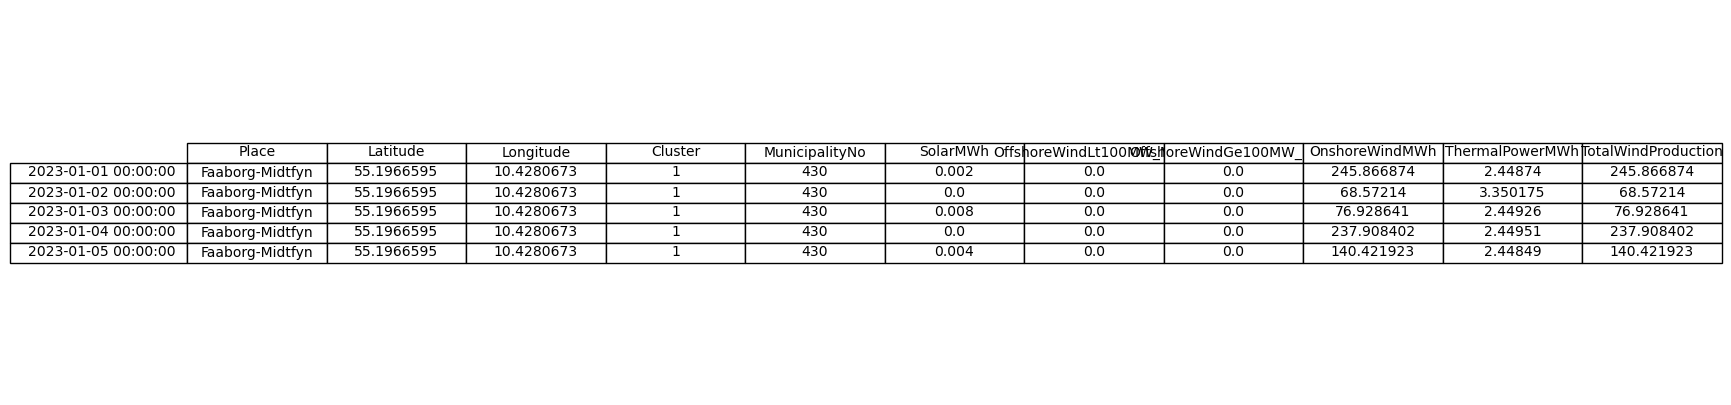

The files have been combined and saved to '/Users/chiranthanyc/Documents/Documents/dissertation/dissertationfiles/final_merged_data.csv'
The table has been saved as an image '/Users/chiranthanyc/Documents/Documents/dissertation/dissertationfiles/final_merged_data_head.png'


In [1]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table

#read clusters file with municipality code
clusters_with_municipality_code_df = pd.read_csv('/Users/chiranthanyc/Documents/Documents/dissertation/dissertationfiles/clusters_with_municipality_code.csv')

#fill nan values in MunicipalityNo with -1 and convert that to int
clusters_with_municipality_code_df['MunicipalityNo'] = clusters_with_municipality_code_df['MunicipalityNo'].fillna(-1).astype(int)

# Load cleaned data file
cleaned_data_df = pd.read_excel('/Users/chiranthanyc/Documents/Documents/dissertation/dissertationfiles/energyProdMun.xlsx')

# Fill nan values in MunicipalityNo with -1 and convert that to int
cleaned_data_df['MunicipalityNo'] = cleaned_data_df['MunicipalityNo'].fillna(-1).astype(int)

# Merge two dataframed on MunicipalityNo
final_merged_df = pd.merge(clusters_with_municipality_code_df, cleaned_data_df, on='MunicipalityNo', how='left')

# Rearrange columns to make place and other columns are to the left
ordered_columns = ['Place', 'Latitude', 'Longitude', 'Cluster', 'MunicipalityNo'] + \
                  [col for col in final_merged_df.columns if col not in ['Place', 'Latitude', 'Longitude', 'Cluster', 'MunicipalityNo']]

final_merged_df = final_merged_df[ordered_columns]

# Convert the Date column to datetime
if 'Date' in final_merged_df.columns:
    final_merged_df['Date'] = pd.to_datetime(final_merged_df['Date'], errors='coerce')

    # Handle datetime columns by filling NaNs with random date
    for col in final_merged_df.select_dtypes(include=['datetime64[ns]']).columns:
        final_merged_df[col] = final_merged_df[col].fillna(pd.Timestamp('1970-01-01'))

# Fill nan values with 0
final_merged_df.fillna(0, inplace=True)

# Set Date as index
if 'Date' in final_merged_df.columns:
    final_merged_df.set_index('Date', inplace=True)

# Save new merged file
output_file = '/Users/chiranthanyc/Documents/Documents/dissertation/dissertationfiles/final_merged_data.csv'
final_merged_df.to_csv(output_file)

# plot and save new merged file
fig, ax = plt.subplots(figsize=(15, 5))  # set size frame
ax.axis('tight')
ax.axis('off')
tbl = table(ax, final_merged_df.head(), loc='center', cellLoc='center', colWidths=[0.1]*len(final_merged_df.columns))
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1.2, 1.2)

image_file = '/Users/chiranthanyc/Documents/Documents/dissertation/dissertationfiles/final_merged_data_head.png'
plt.savefig(image_file)
plt.show()

print(f"The files have been combined and saved to '{output_file}'")
print(f"The table has been saved as an image '{image_file}'")


In [47]:
#import necessary packages
import pandas as pd
import numpy as np
import os

# Function to preprocess each cluster related weather files
def preprocess_weather_data(file_path):
    # skip first 13 rows which contain info about dataset
    data = pd.read_csv(file_path, skiprows=13)
    
    # ensure all the columns are correctly stripped
    data.columns = data.columns.str.strip()
    
    # convert year, month, day to datetime format
    data['datetime'] = pd.to_datetime(data[['YEAR', 'MO', 'DY']].rename(columns={'YEAR': 'year', 'MO': 'month', 'DY': 'day'}))
    
    # Calculate wind shear
    data['wind_shear'] = np.log(data['WS50M'] / data['WS10M']) / np.log(50 / 10)
    
    # Convert wind direction to u and v components at 10m and 50m
    data['wind_u_10m'] = data['WS10M'] * np.cos(np.radians(data['WD10M']))
    data['wind_v_10m'] = data['WS10M'] * np.sin(np.radians(data['WD10M']))
    data['wind_u_50m'] = data['WS50M'] * np.cos(np.radians(data['WD50M']))
    data['wind_v_50m'] = data['WS50M'] * np.sin(np.radians(data['WD50M']))
    
    # drop year, month, day columns as we have datetime column added
    data = data.drop(columns=['YEAR', 'MO', 'DY'])
    
    return data

# directory to read cluster files
weather_data_dir = '/Users/chiranthanyc/Documents/Documents/dissertation/dissertationfiles/'

# Empty list to store cluster related weather files
all_clusters_weather_data = []

# Loop through each cluster file and preprocess it
for cluster_num in range(1, 11):
    file_path = f'{weather_data_dir}/c{cluster_num}locationwind.csv'
    if os.path.exists(file_path):
        cluster_weather_data = preprocess_weather_data(file_path)
        cluster_weather_data['Cluster'] = cluster_num
        all_clusters_weather_data.append(cluster_weather_data)
    else:
        print(f"File for cluster {cluster_num} does not exist.")

# add all weather files into one file
combined_weather_data = pd.concat(all_clusters_weather_data, ignore_index=True)

# save the new combined file
combined_weather_data_file_path = f'{weather_data_dir}/combined_weather_data.csv'
combined_weather_data.to_csv(combined_weather_data_file_path, index=False)

# display head of new file
print(combined_weather_data.head())


       PS  WS10M   WD10M  WS50M   WD50M   datetime  wind_shear  wind_u_10m  \
0  100.35   9.10  231.75  12.52  232.56 2023-01-01    0.198239   -5.633755   
1  100.83   5.22  229.19   7.45  229.88 2023-01-02    0.221019   -3.411545   
2  101.94   6.83  236.44   8.91  237.00 2023-01-03    0.165182   -3.775692   
3  100.15  10.40  219.62  13.43  221.06 2023-01-04    0.158866   -8.011023   
4  100.74   7.91  267.62   9.88  268.56 2023-01-05    0.138175   -0.328478   

   wind_v_10m  wind_u_50m  wind_v_50m  Cluster  
0   -7.146384   -7.611287   -9.940760        1  
1   -3.950919   -4.800710   -5.696989        1  
2   -5.691489   -4.852734   -7.472555        1  
3   -6.632006  -10.126517   -8.821482        1  
4   -7.903177   -0.248285   -9.876880        1  


In [48]:
#import pandas as pd
import pandas as pd

# Load the new weather file
file_path = '/Users/chiranthanyc/Documents/Documents/dissertation/dissertationfiles/combined_weather_data.csv'
combined_weather_data = pd.read_csv(file_path)

# Convert 'datetime' to datetime object and set it to index
combined_weather_data['datetime'] = pd.to_datetime(combined_weather_data['datetime'])
combined_weather_data.set_index('datetime', inplace=True)

# display the head of new file
from IPython.display import display, HTML
display(HTML(combined_weather_data.head().to_html()))


In [49]:
#import pandas
import pandas as pd

# Load both processed energy production data and combined weather related data
final_merged_data = pd.read_csv('/Users/chiranthanyc/Documents/Documents/dissertation/dissertationfiles/final_merged_data.csv')
combined_weather_data = pd.read_csv('/Users/chiranthanyc/Documents/Documents/dissertation/dissertationfiles/combined_weather_data.csv')

#convert date to datetime format
final_merged_data['Date'] = pd.to_datetime(final_merged_data['Date'], errors='coerce')
combined_weather_data['datetime'] = pd.to_datetime(combined_weather_data['datetime'], errors='coerce')

# drop rows with invalid dates
final_merged_data_cleaned = final_merged_data.dropna(subset=['Date'])

# Merge the dataframes on 'Cluster' and 'Date'/'datetime'
merged_data_cleaned = pd.merge(final_merged_data_cleaned, combined_weather_data, how='inner', left_on=['Cluster', 'Date'], right_on=['Cluster', 'datetime'])

# Drop duplicate datetime column
merged_data_cleaned.drop(columns=['datetime'], inplace=True)

# save the new file
output_file_path_cleaned = '/Users/chiranthanyc/Documents/Documents/dissertation/dissertationfiles/finalCombinedData.csv'
merged_data_cleaned.to_csv(output_file_path_cleaned, index=False)

print(f"Merged data saved to {output_file_path_cleaned}")


Merged data saved to /Users/chiranthanyc/Documents/Documents/dissertation/dissertationfiles/finalCombinedData.csv


In [50]:
#import pandas 
import pandas as pd

# Load finalcombineddata file
file_path = '/Users/chiranthanyc/Documents/Documents/dissertation/dissertationfiles/finalCombinedData.csv'
data = pd.read_csv(file_path)

# Grouping the data by 'Date' and 'Cluster' and summing the relevant columns
grouped_data = data.groupby(['Date', 'Cluster']).agg({
    'SolarMWh': 'sum',
    'OffshoreWindLt100MW_MWh': 'sum',
    'OffshoreWindGe100MW_MWh': 'sum',
    'OnshoreWindMWh': 'sum',
    'ThermalPowerMWh': 'sum',
    'TotalWindProduction': 'sum',
    'WD50M': 'first',
    'WS50M': 'first',
    'WD10M': 'first',
    'WS10M': 'first',
    'PS': 'first',
    'wind_shear': 'first',
    'wind_u_10m': 'first',
    'wind_v_10m': 'first',
    'wind_u_50m': 'first',
    'wind_v_50m': 'first'
}).reset_index()

# Save the final file ready for eda
output_file_path = '/Users/chiranthanyc/Documents/Documents/dissertation/dissertationfiles/clusterFinalData.csv'
grouped_data.to_csv(output_file_path, index=False)

print(f"Grouped data saved to {output_file_path}")


Grouped data saved to /Users/chiranthanyc/Documents/Documents/dissertation/dissertationfiles/clusterFinalData.csv


In [51]:
#-------------eda starts from here---------
#import pandas

import pandas as pd

# Load the comprehensive dataset
file_path = '/Users/chiranthanyc/Documents/Documents/dissertation/dissertationfiles/clusterFinalData.csv'
data = pd.read_csv(file_path)

# Select relevant columns for wind production and weather analysis
wind_production_weather_columns = [
    'OffshoreWindLt100MW_MWh', 'OffshoreWindGe100MW_MWh', 'OnshoreWindMWh', 'TotalWindProduction',
    'WD50M', 'WS50M', 'WD10M', 'WS10M', 'PS', 'wind_shear', 
    'wind_u_10m', 'wind_v_10m', 'wind_u_50m', 'wind_v_50m'
]

# Summary statistics for wind energy and weather variables
summary_statistics = data[wind_production_weather_columns].describe()

# Data types of each column
data_types = data[wind_production_weather_columns].dtypes

# Display results
print("Summary Statistics for Wind Production and Weather Variables:")
print(summary_statistics)
print("\nData Types for Wind Production and Weather Variables:")
print(data_types)



Summary Statistics for Wind Production and Weather Variables:
       OffshoreWindLt100MW_MWh  OffshoreWindGe100MW_MWh  OnshoreWindMWh  \
count              3625.000000              3625.000000     3625.000000   
mean                248.459202               951.859130     2963.413146   
std                 585.042963              1975.019579     3564.451420   
min                   0.000000                 0.000000        0.024980   
25%                   0.000000                 0.000000      392.194597   
50%                  17.140000                 0.000000     1582.813806   
75%                 198.332121               702.740004     4247.257349   
max                3735.256270              9587.373321    20439.529108   

       TotalWindProduction        WD50M        WS50M        WD10M  \
count          3625.000000  3625.000000  3625.000000  3625.000000   
mean           4163.731478   199.234193     7.933183   198.736883   
std            4994.486445    75.784030     3.200832   

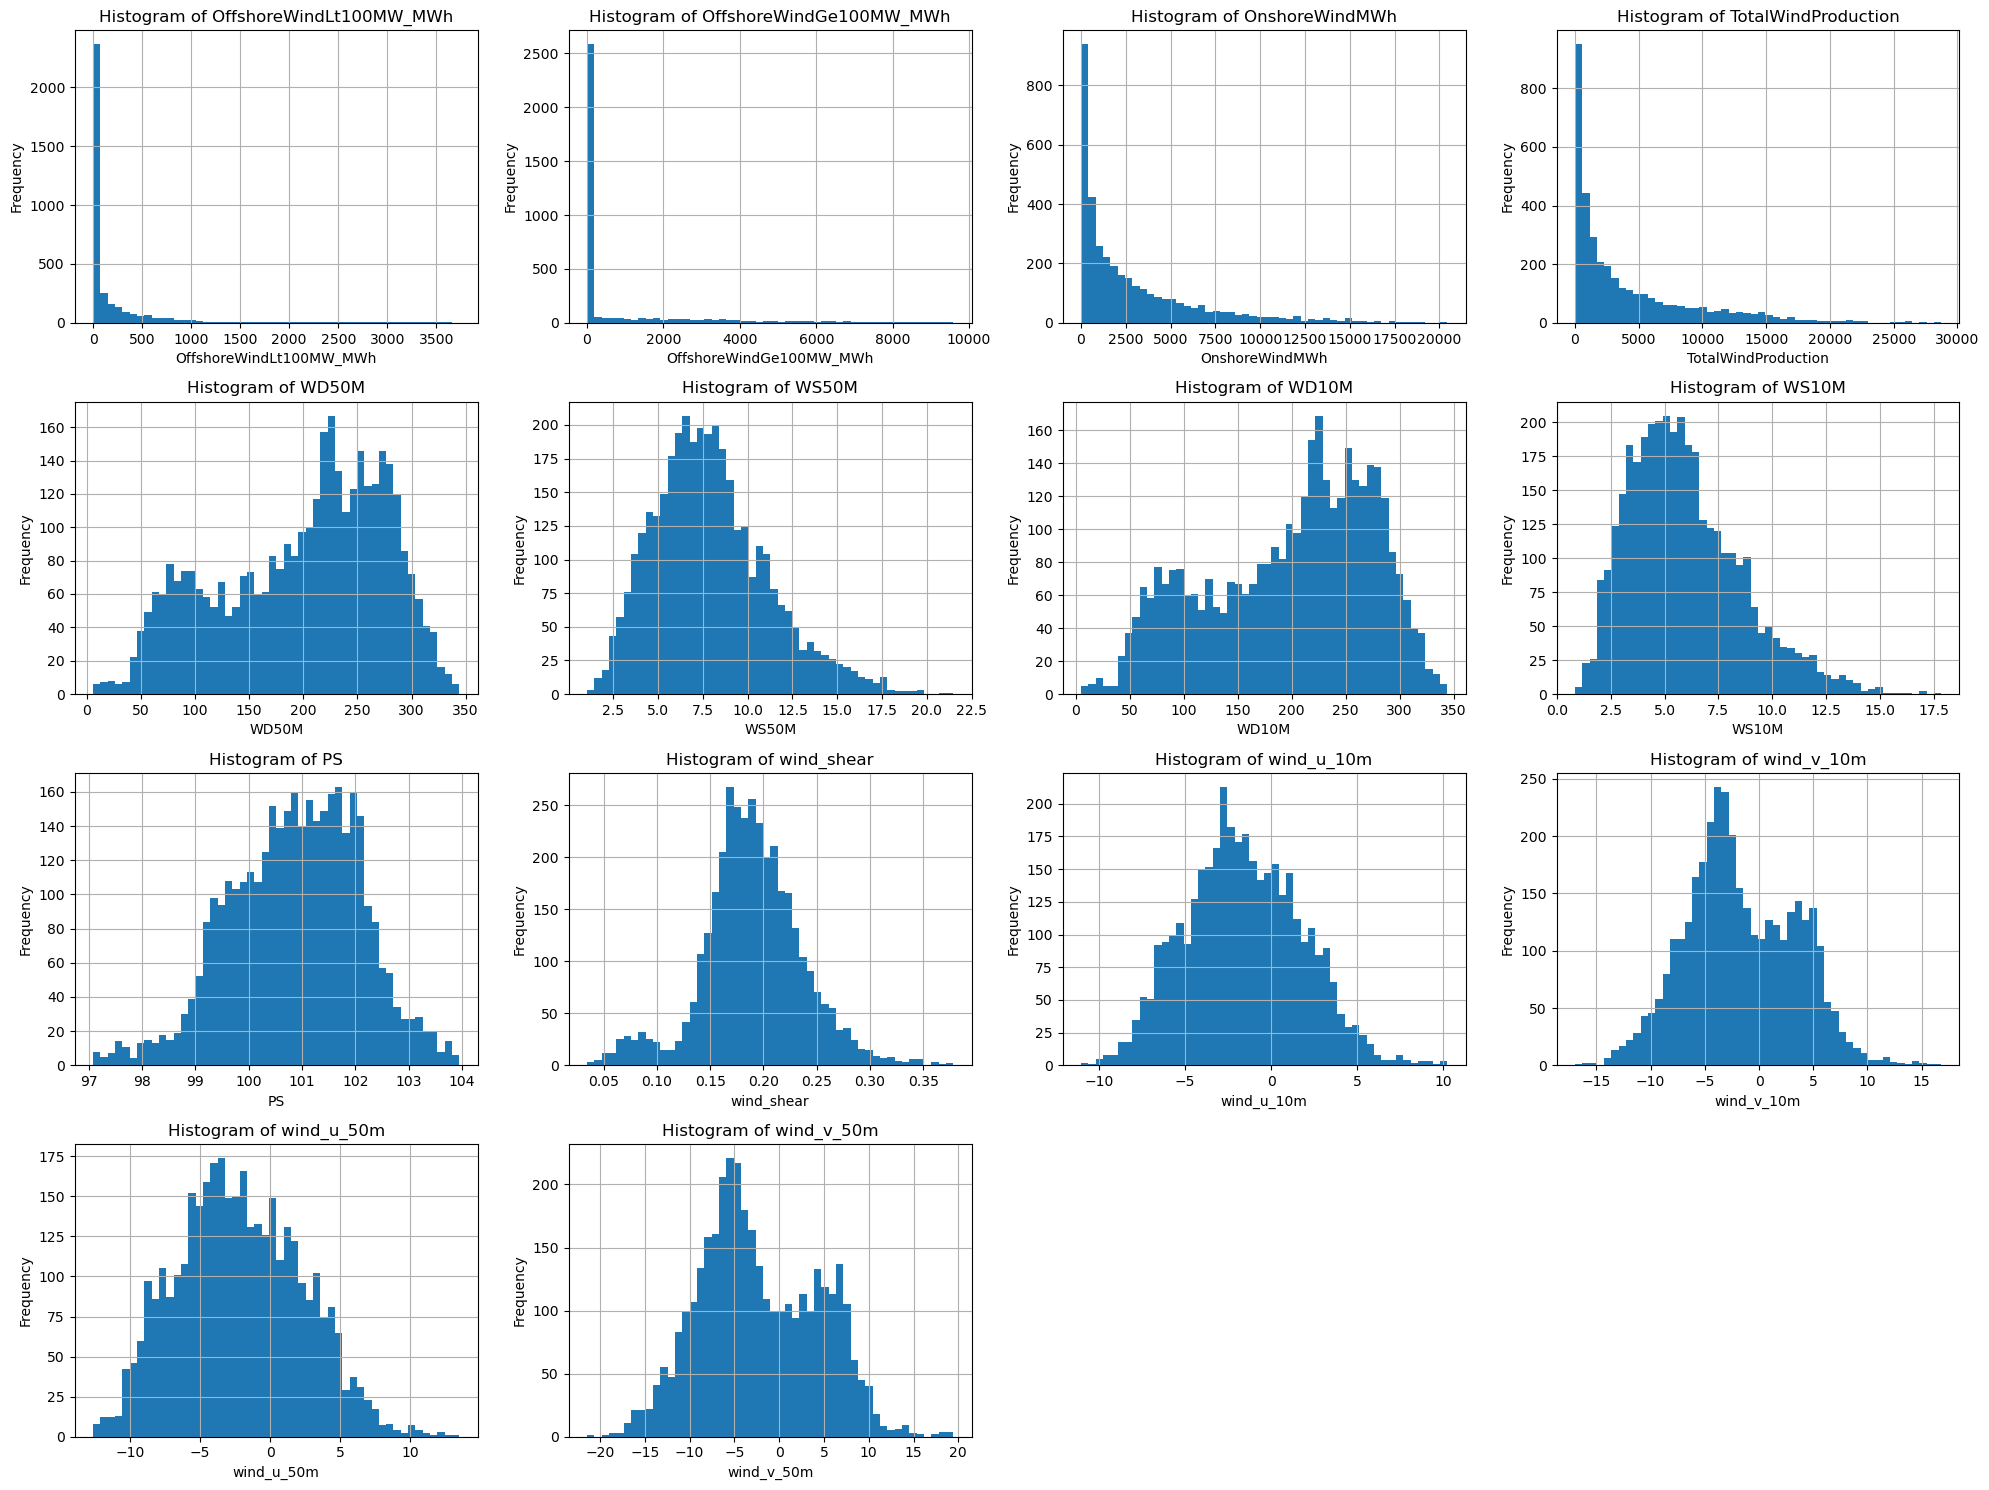

In [52]:
#import matplotlib for plotting
import matplotlib.pyplot as plt

# wind energy and weather variables
variables_to_plot = [
    'OffshoreWindLt100MW_MWh', 'OffshoreWindGe100MW_MWh', 'OnshoreWindMWh', 'TotalWindProduction',
    'WD50M', 'WS50M', 'WD10M', 'WS10M', 'PS', 'wind_shear', 
    'wind_u_10m', 'wind_v_10m', 'wind_u_50m', 'wind_v_50m'
]

# create histograms for each variable
plt.figure(figsize=(20, 15))
for i, variable in enumerate(variables_to_plot, 1):
    plt.subplot(4, 4, i)
    data[variable].hist(bins=50)
    plt.title(f'Histogram of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('/Users/chiranthanyc/Documents/Documents/dissertation/dissertationfiles/histograms.png')
plt.show()


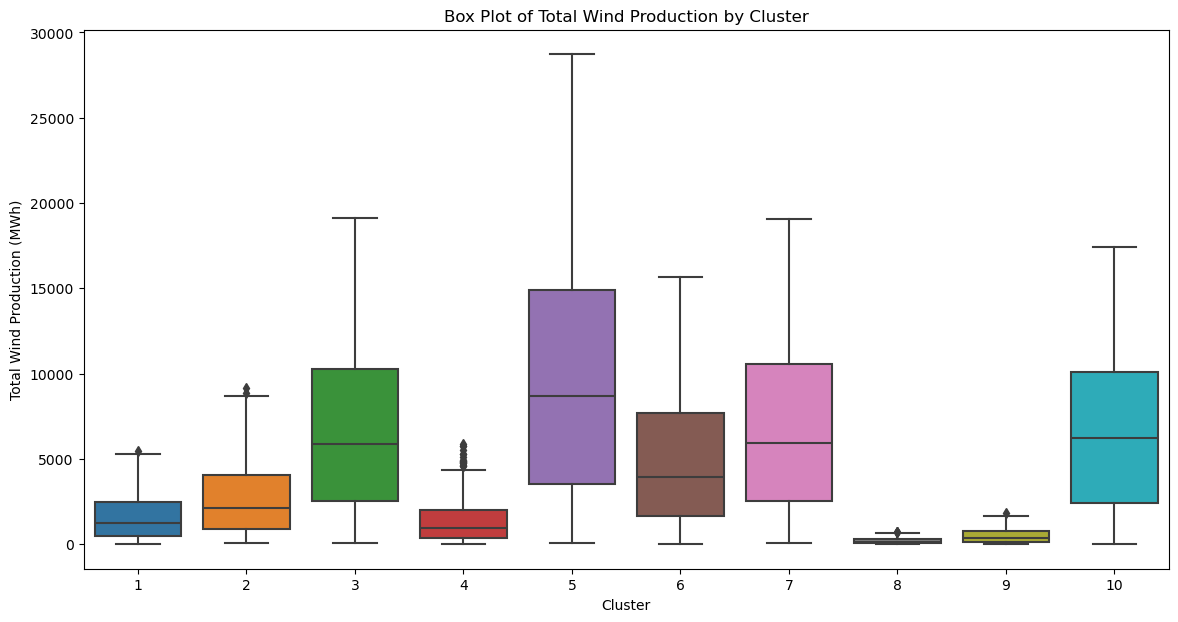

In [53]:
#import plotting packages
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/Users/chiranthanyc/Documents/Documents/dissertation/dissertationfiles/clusterFinalData.csv'
data = pd.read_csv(file_path)

# Create box plots for Total Wind Production by Cluster
plt.figure(figsize=(14, 7))
sns.boxplot(x='Cluster', y='TotalWindProduction', data=data)

# Set titles and labels
plt.title('Box Plot of Total Wind Production by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Wind Production (MWh)')

# Save the plot as an image
plt.savefig('/Users/chiranthanyc/Documents/Documents/dissertation/dissertationfiles/boxplot_clusters.png')

# display plot
plt.show()


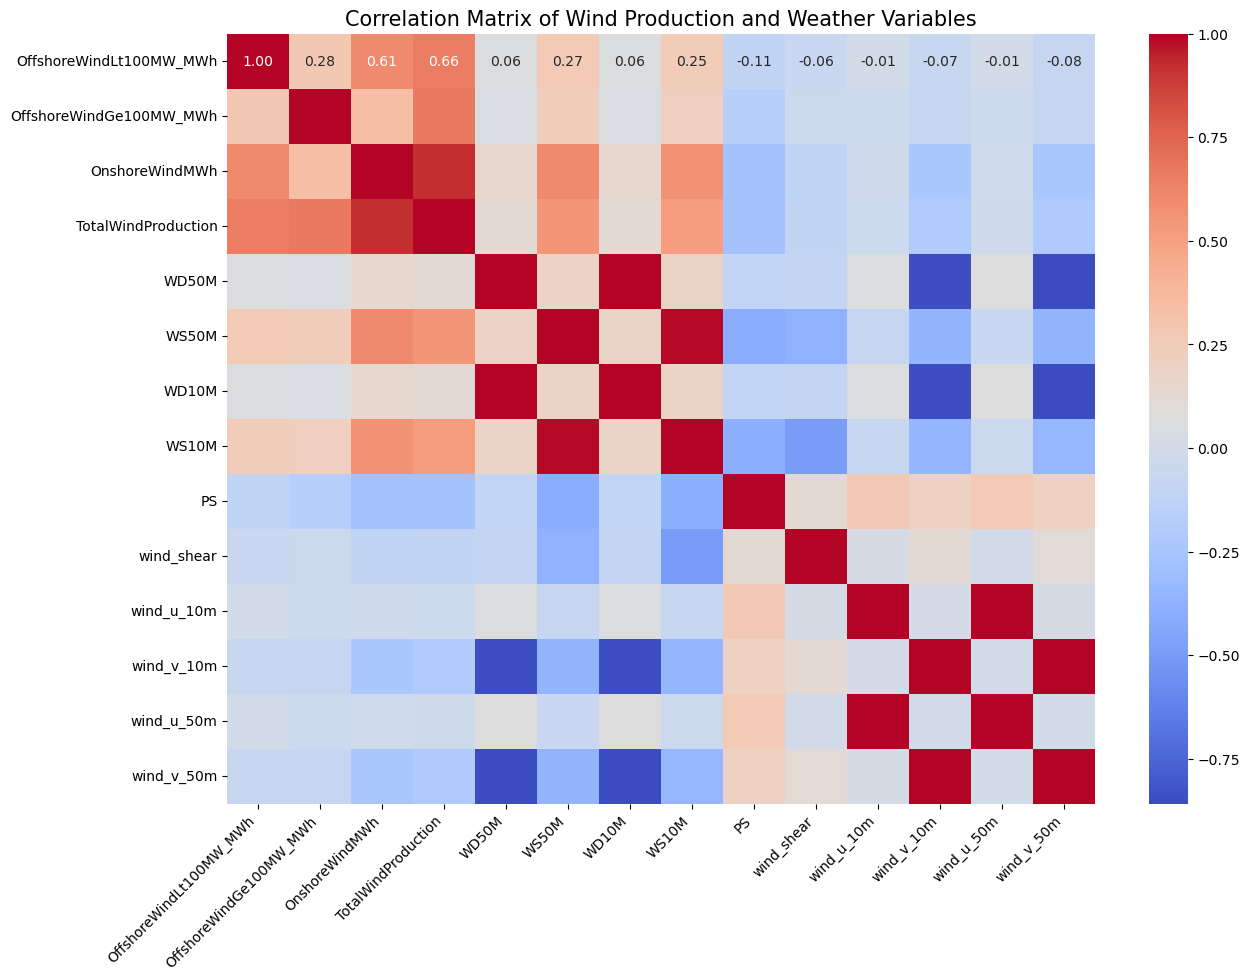

In [54]:
#import necessary packages
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
file_path = '/Users/chiranthanyc/Documents/Documents/dissertation/dissertationfiles/clusterFinalData.csv'
data = pd.read_csv(file_path)

# select wind and weather variables
wind_production_weather_columns = [
    'OffshoreWindLt100MW_MWh', 'OffshoreWindGe100MW_MWh', 'OnshoreWindMWh', 'TotalWindProduction',
    'WD50M', 'WS50M', 'WD10M', 'WS10M', 'PS', 'wind_shear', 
    'wind_u_10m', 'wind_v_10m', 'wind_u_50m', 'wind_v_50m'
]

# Calculate the correlation matrix
correlation_matrix = data[wind_production_weather_columns].corr()

# Set figure size
plt.figure(figsize=(14, 10))

# Create a heatmap of correlation matrix
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})

# Set titles and labels
heatmap.set_title('Correlation Matrix of Wind Production and Weather Variables', fontsize=15)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)

# Save the image
plt.savefig('/Users/chiranthanyc/Documents/Documents/dissertation/dissertationfiles/correlation_matrix.png', bbox_inches='tight')

# Show plot
plt.show()


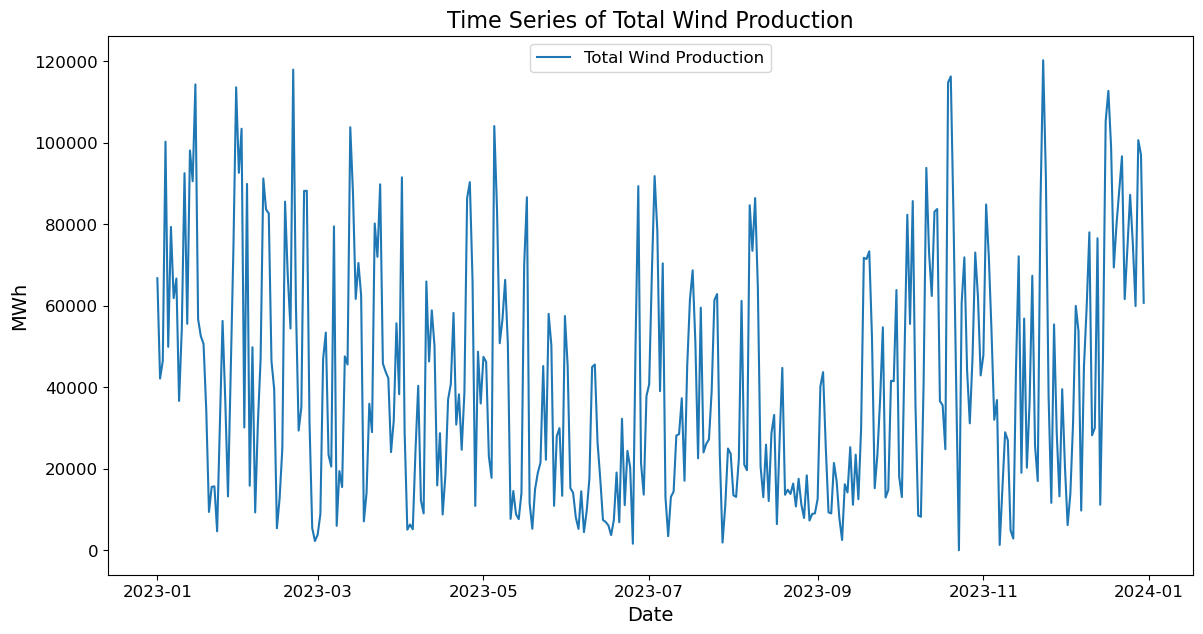

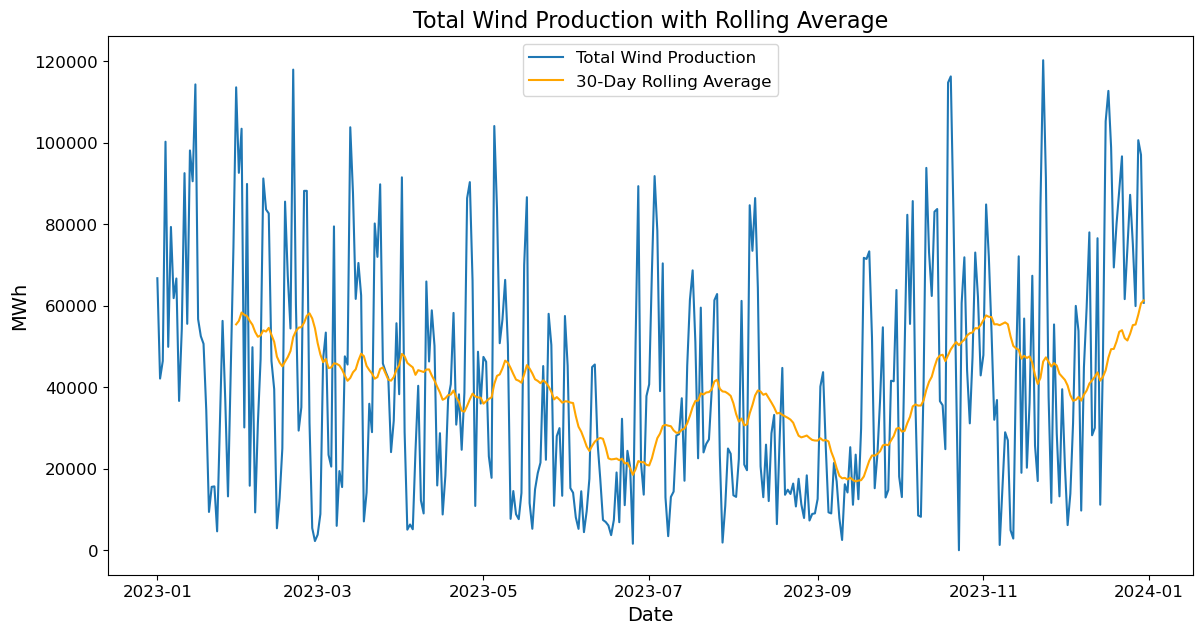

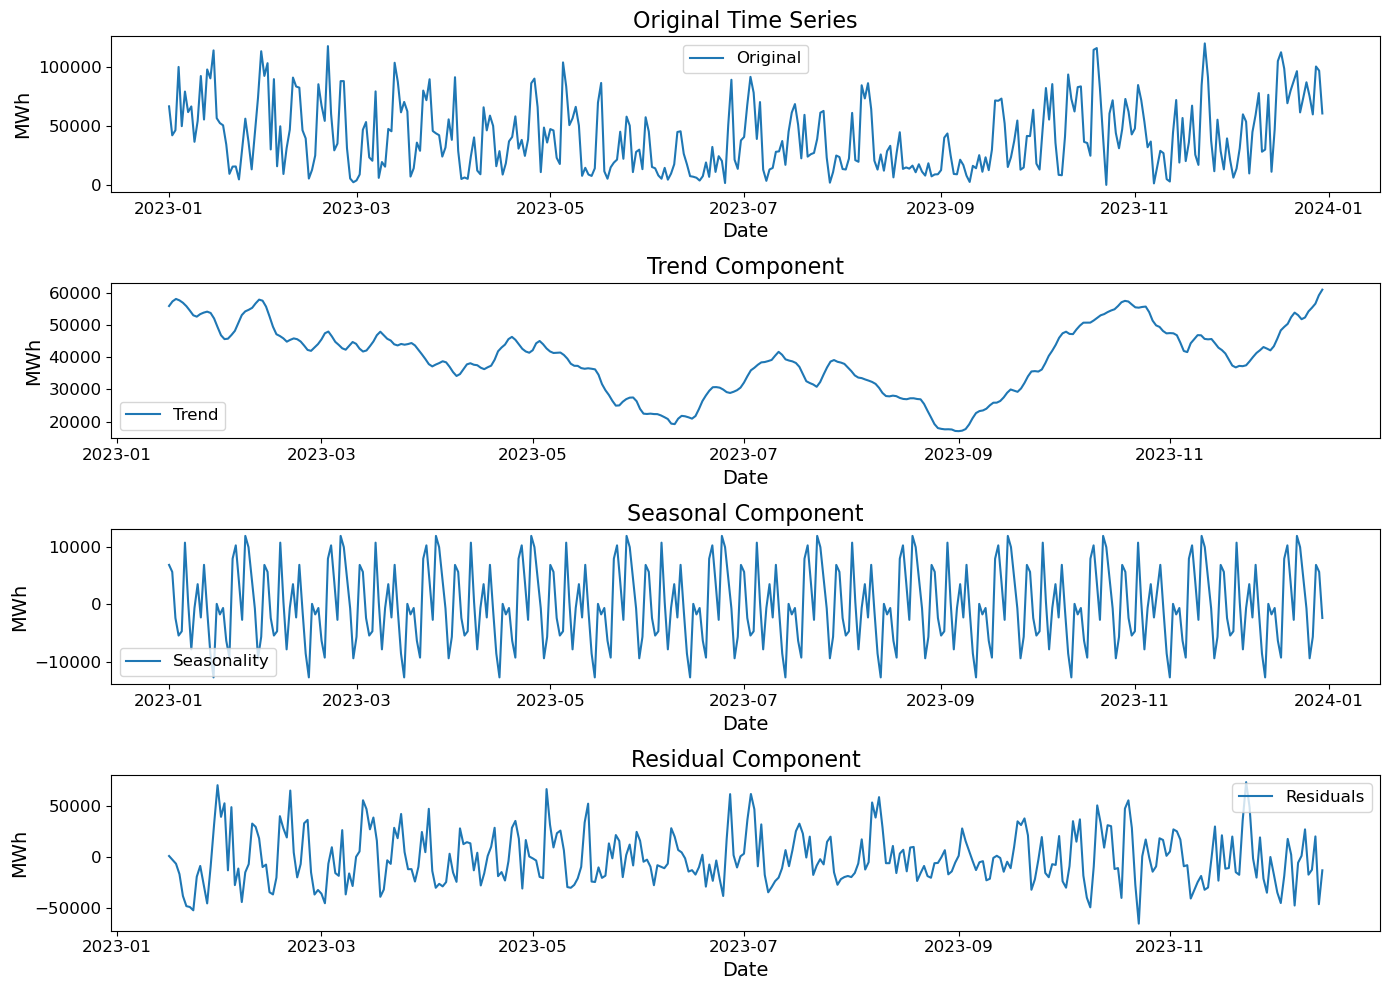

In [55]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the final processed file
file_path = '/Users/chiranthanyc/Documents/Documents/dissertation/dissertationfiles/clusterFinalData.csv'
data = pd.read_csv(file_path)

# Convert 'Date' column to datetime if it's not already done
data['Date'] = pd.to_datetime(data['Date'])

# sum TotalWindProduction across all clusters for each date
aggregated_data = data.groupby('Date')['TotalWindProduction'].sum().reset_index()

# Set 'Date' as the index
aggregated_data.set_index('Date', inplace=True)

# Plot time series for summed TotalWindProduction
plt.figure(figsize=(14, 7))
plt.plot(aggregated_data['TotalWindProduction'], label='Total Wind Production')
plt.title('Time Series of Total Wind Production', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('MWh', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.savefig('/Users/chiranthanyc/Documents/Documents/dissertation/dissertationfiles/Time_Series_Total_Wind_Production.png')
plt.show()

# Calculate and plot rolling average 
rolling_window = 30  # 30-day rolling window
aggregated_data['TotalWindProduction_Rolling'] = aggregated_data['TotalWindProduction'].rolling(window=rolling_window).mean()

plt.figure(figsize=(14, 7))
plt.plot(aggregated_data['TotalWindProduction'], label='Total Wind Production')
plt.plot(aggregated_data['TotalWindProduction_Rolling'], label=f'{rolling_window}-Day Rolling Average', color='orange')
plt.title('Total Wind Production with Rolling Average', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('MWh', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.savefig('/Users/chiranthanyc/Documents/Documents/dissertation/dissertationfiles/Total_Wind_Production_Rolling_Average.png')
plt.show()

# Decompose time series to identify trend and seasonality for 30-day period
decomposition = seasonal_decompose(aggregated_data['TotalWindProduction'], model='additive', period=30)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(aggregated_data['TotalWindProduction'], label='Original')
plt.legend(loc='best', fontsize=12)
plt.title('Original Time Series', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('MWh', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best', fontsize=12)
plt.title('Trend Component', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('MWh', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best', fontsize=12)
plt.title('Seasonal Component', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('MWh', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best', fontsize=12)
plt.title('Residual Component', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('MWh', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.savefig('/Users/chiranthanyc/Documents/Documents/dissertation/dissertationfiles/Time_Series_Decomposition.png')
plt.show()


Correlation of weather-related features with TotalWindProduction:
WD50M         0.128517
WS50M         0.555738
WD10M         0.126246
WS10M         0.518936
PS           -0.272393
wind_shear   -0.107156
wind_u_10m   -0.033840
wind_v_10m   -0.201916
wind_u_50m   -0.029747
wind_v_50m   -0.209516
Name: TotalWindProduction, dtype: float64
Selected weather-related features based on correlation: ['WS50M', 'WS10M', 'PS', 'wind_v_10m', 'wind_v_50m']


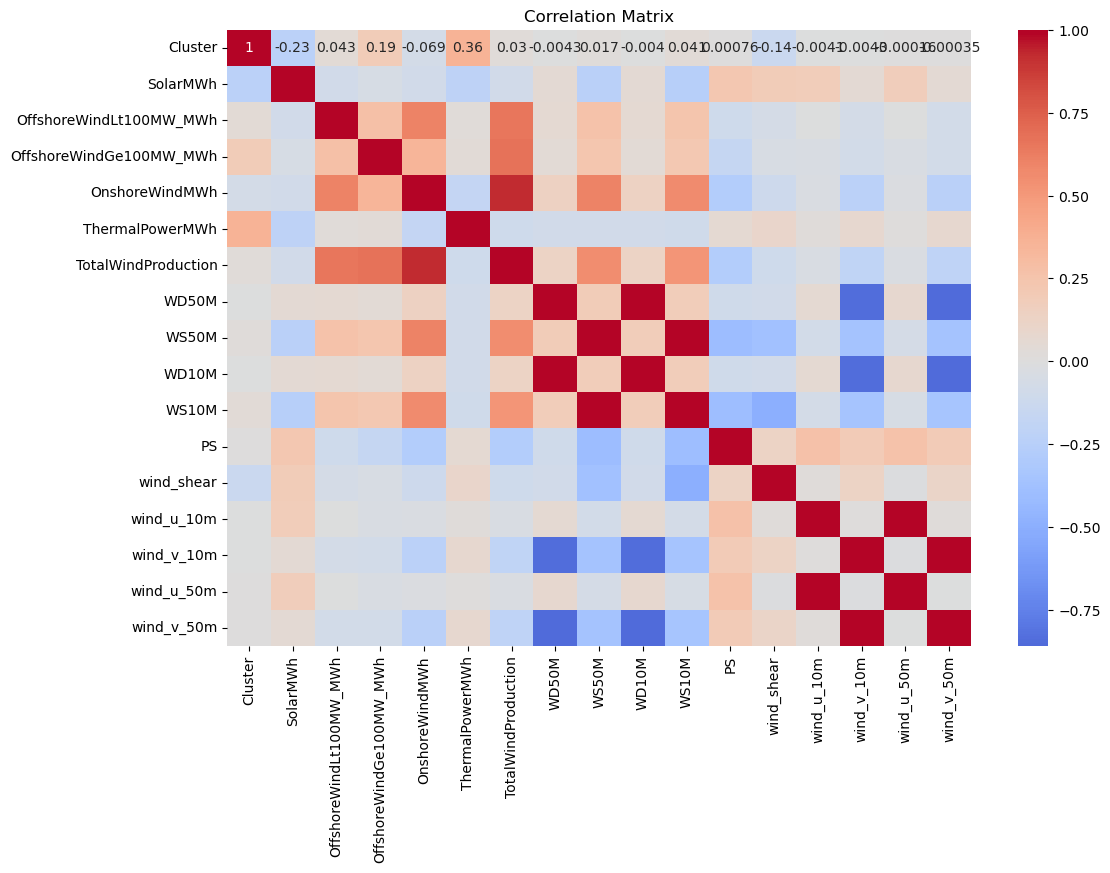

Cluster 1:
  MSE Train: 108354.9330
  MSE Test: 362371.2930
  RMSE Train: 329.1731
  RMSE Test: 601.9728
  MAE Train: 262.7429
  MAE Test: 454.9319
  R² Train: 0.9354
  R² Test: 0.8221

Cluster 2:
  MSE Train: 405276.6630
  MSE Test: 785370.4166
  RMSE Train: 636.6134
  RMSE Test: 886.2113
  MAE Train: 474.5970
  MAE Test: 701.2523
  R² Train: 0.8934
  R² Test: 0.8568

Cluster 3:
  MSE Train: 4208349.1057
  MSE Test: 11725160.2465
  RMSE Train: 2051.4261
  RMSE Test: 3424.2021
  MAE Train: 1507.2622
  MAE Test: 2575.3695
  R² Train: 0.8304
  R² Test: 0.5933

Cluster 4:
  MSE Train: 117587.3352
  MSE Test: 308527.9991
  RMSE Train: 342.9101
  RMSE Test: 555.4530
  MAE Train: 260.9392
  MAE Test: 430.6471
  R² Train: 0.9240
  R² Test: 0.8697

Cluster 5:
  MSE Train: 4165067.4823
  MSE Test: 13854420.3309
  RMSE Train: 2040.8497
  RMSE Test: 3722.1526
  MAE Train: 1579.2928
  MAE Test: 2811.4371
  R² Train: 0.9158
  R² Test: 0.7772

Cluster 6:
  MSE Train: 1673892.5285
  MSE Test: 2332201

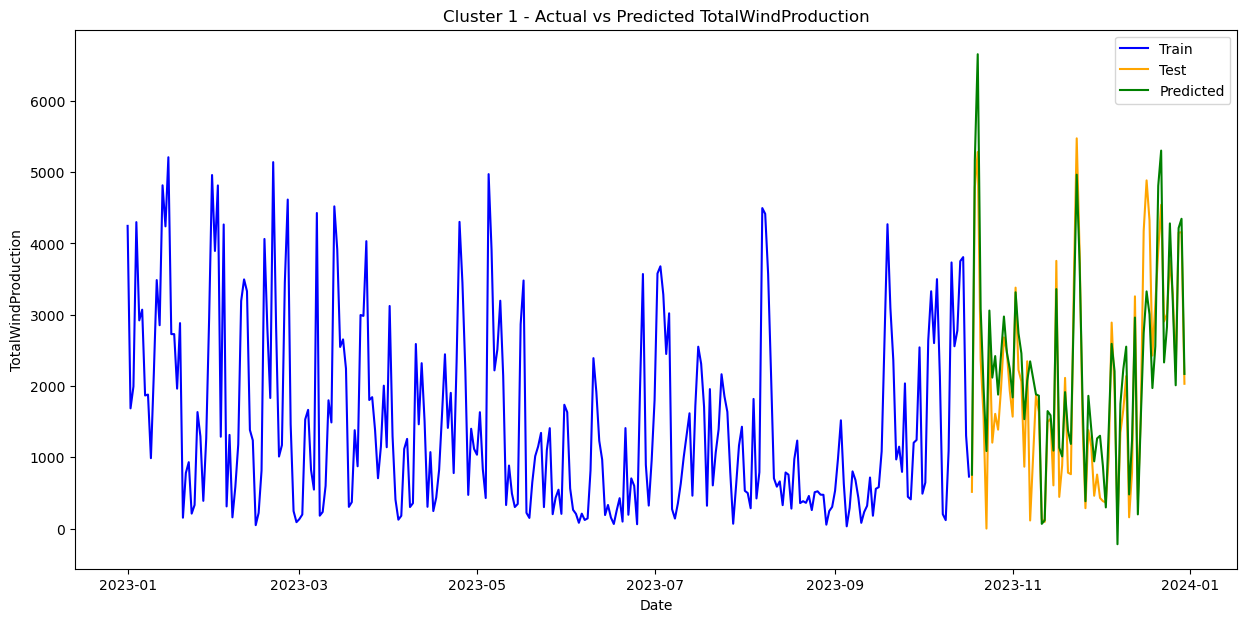

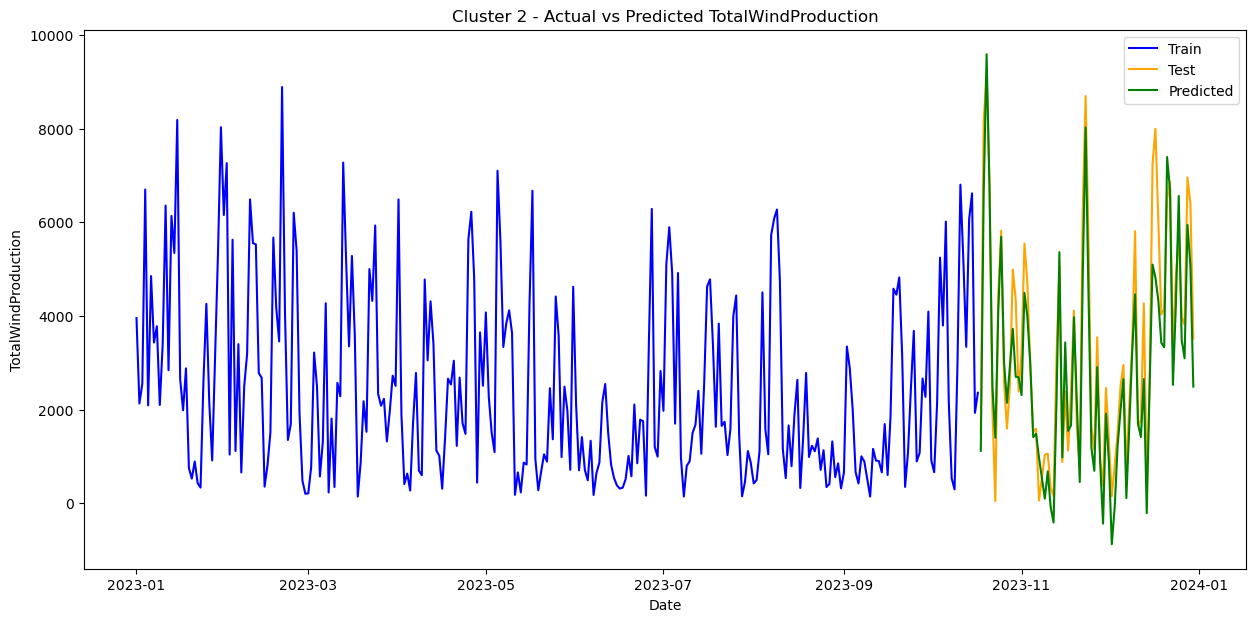

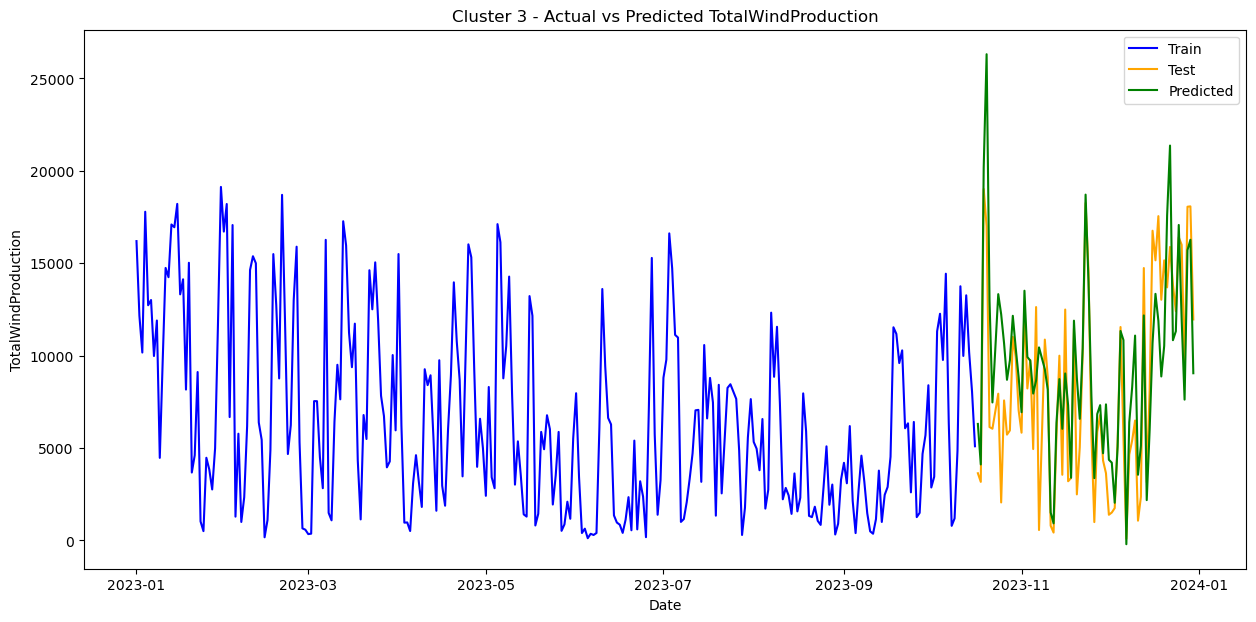

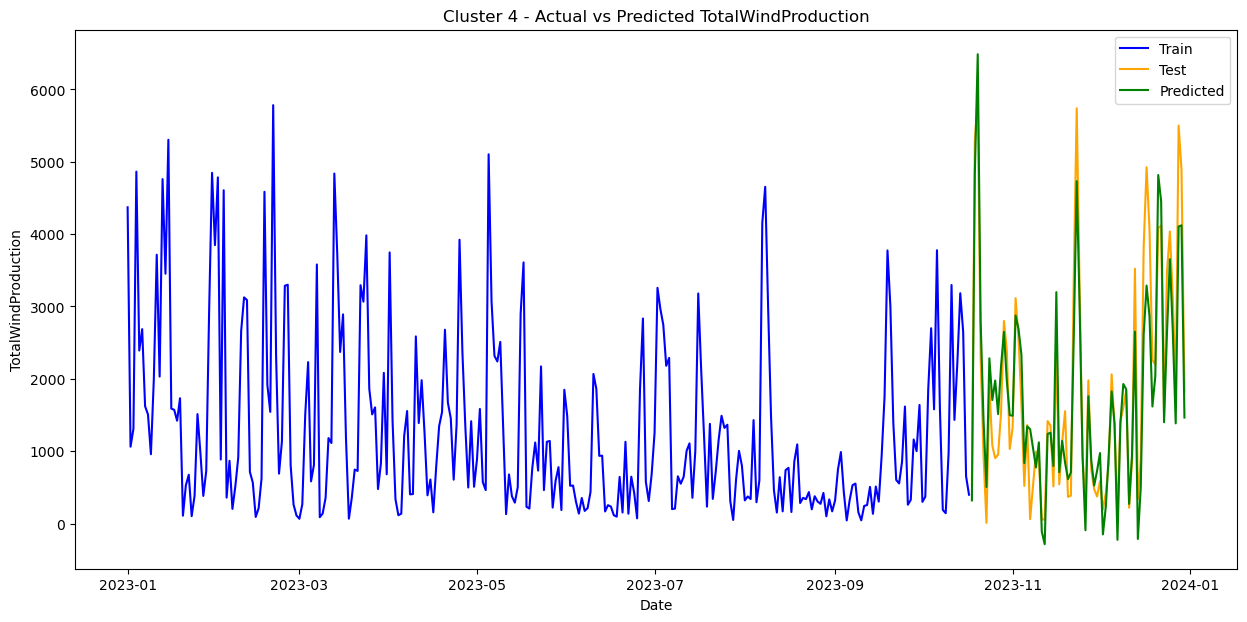

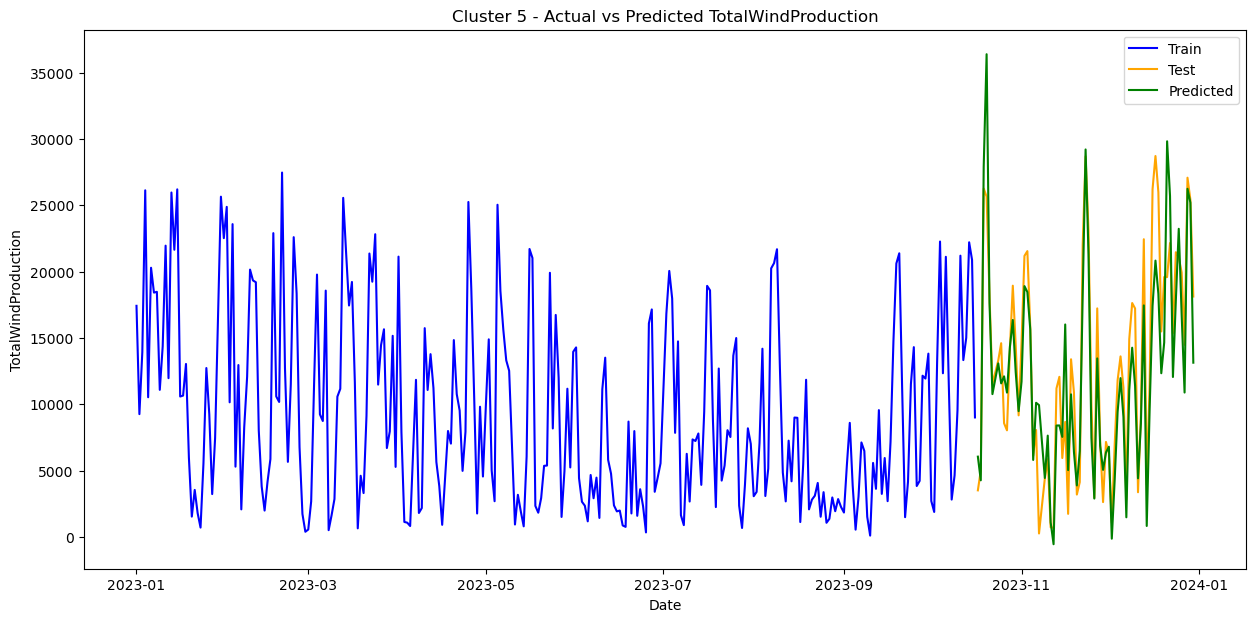

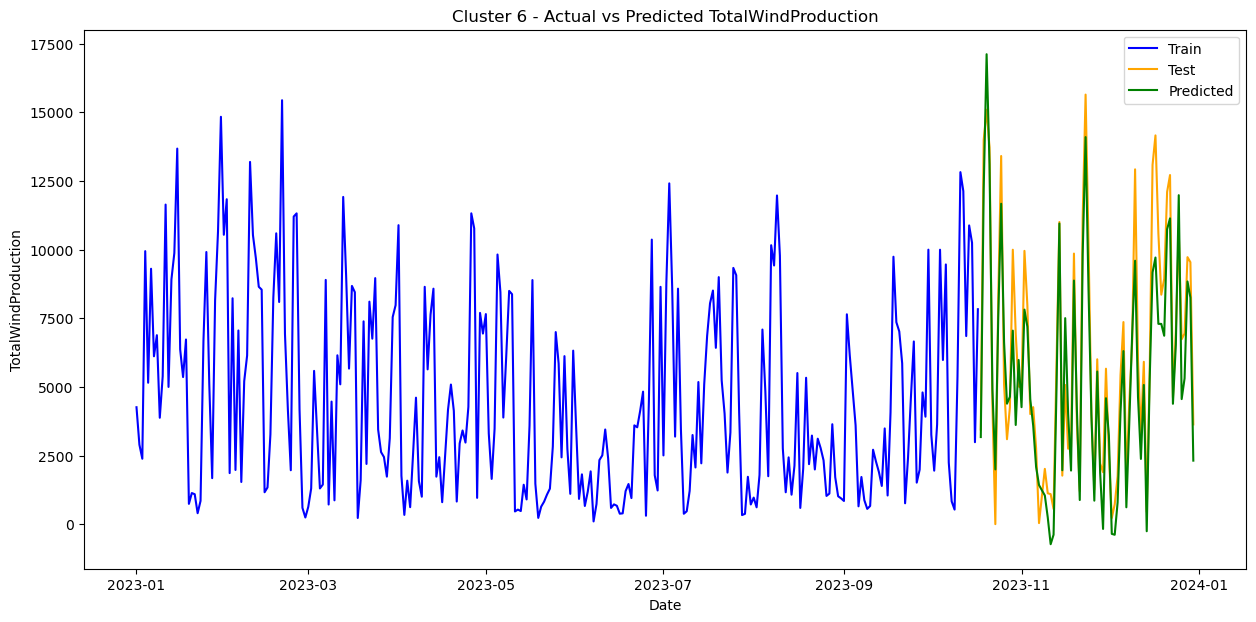

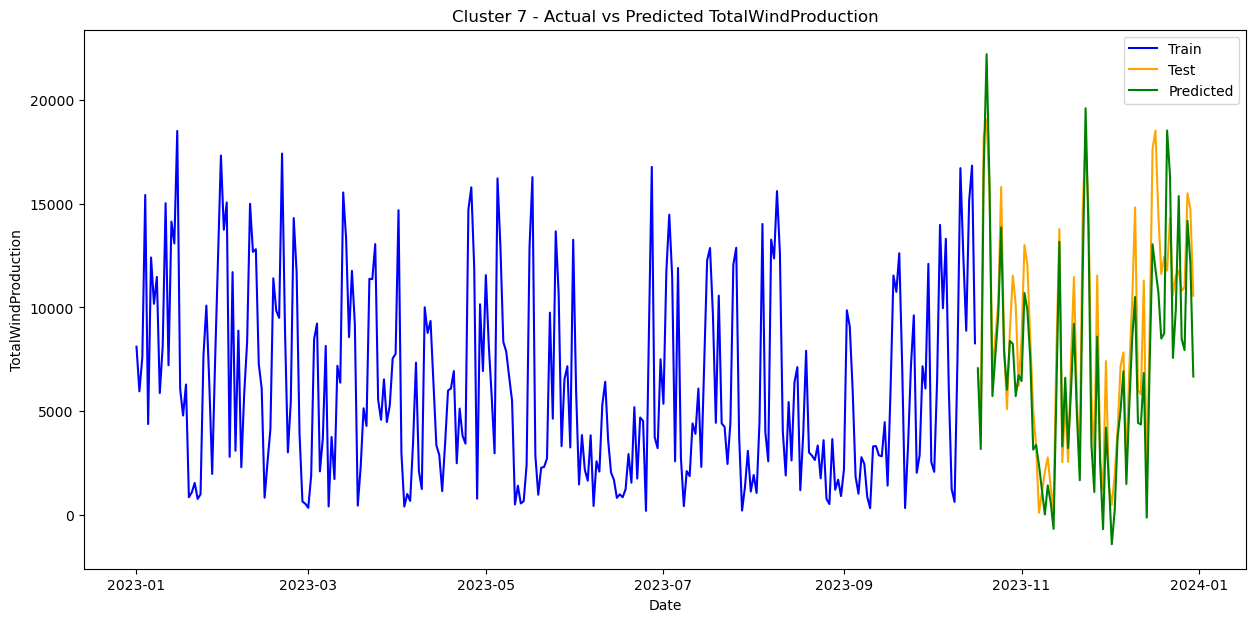

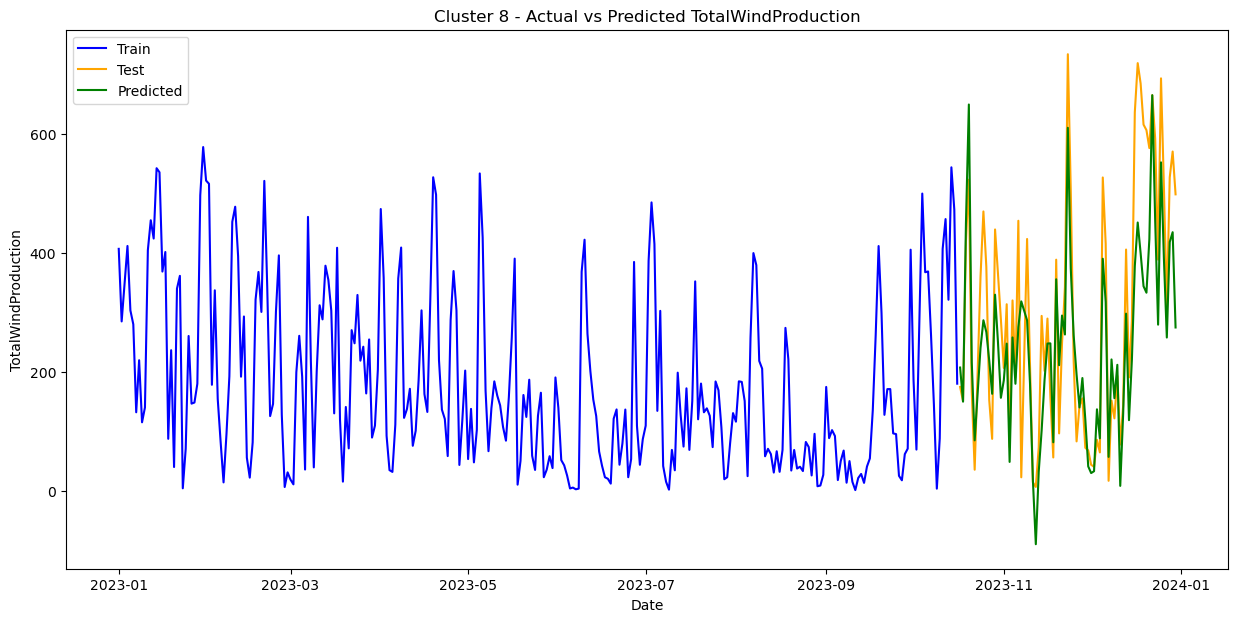

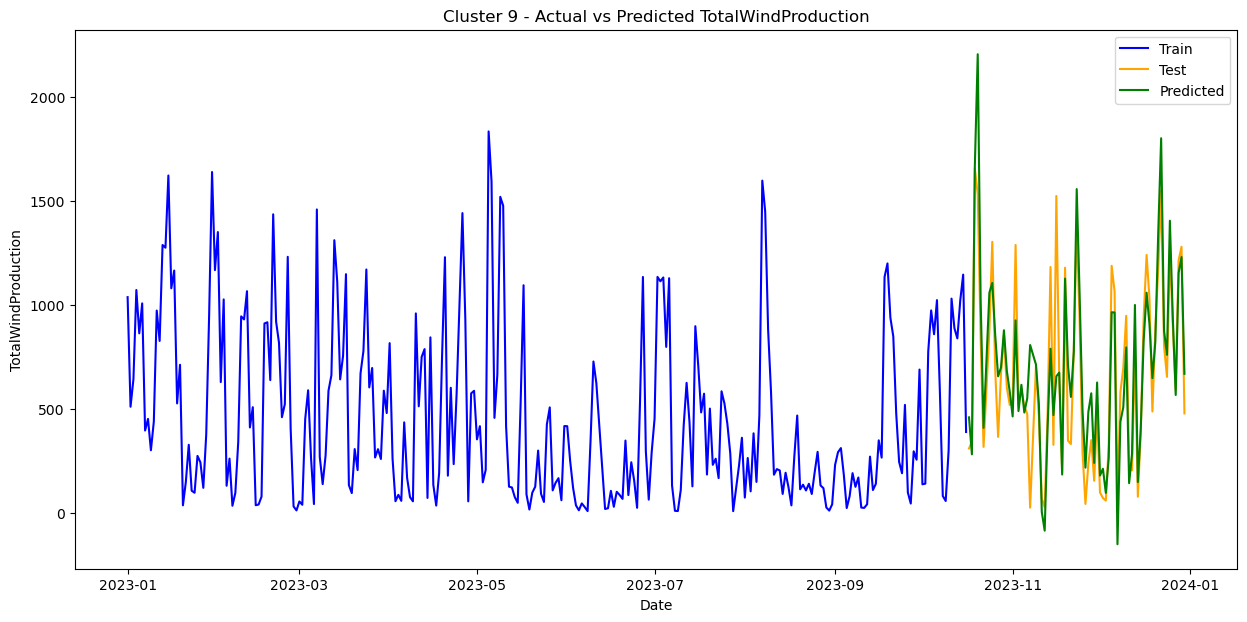

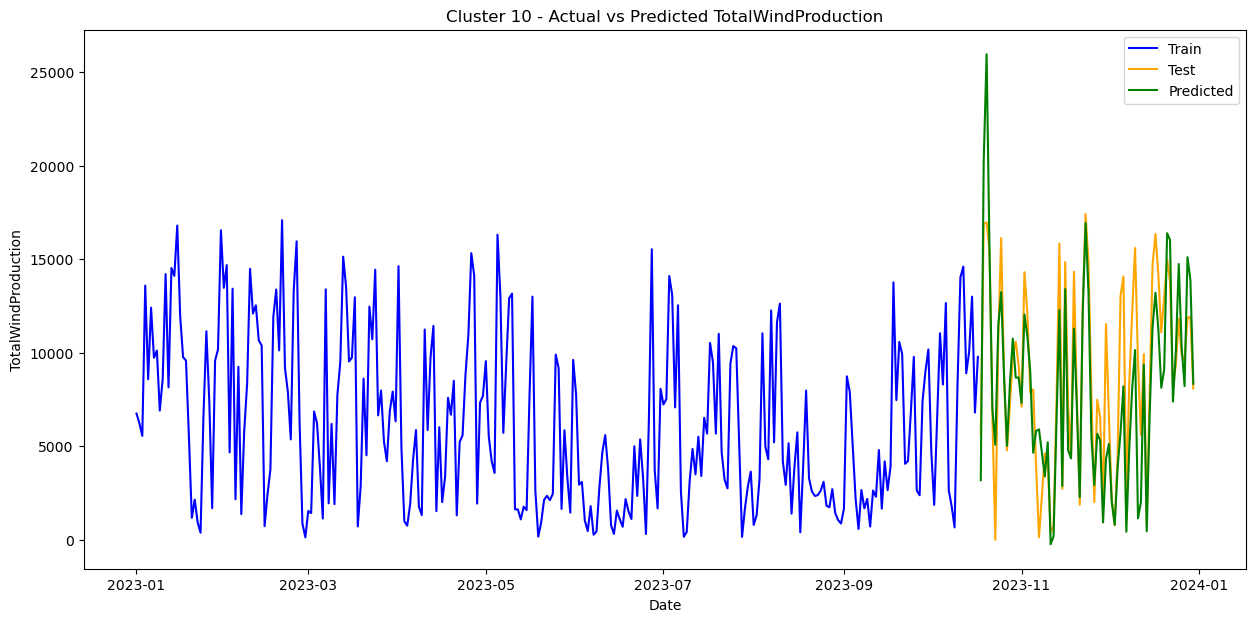

In [57]:
#import necessary packages required for linear regression
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np

# Load the dataset
file_path = '/Users/chiranthanyc/Documents/Documents/dissertation/daywise/clusterFinalData.csv'  # Update with your local path
data = pd.read_csv(file_path)

# Convert the Date column to datetime format just for confirmation
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data.set_index('Date', inplace=True)

# sort data by date for sequential representation
data.sort_index(inplace=True)

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Extract the correlation of each feature with the target variable
target_correlation = correlation_matrix['TotalWindProduction']

# weather related features
weather_features = ['WD50M', 'WS50M', 'WD10M', 'WS10M', 'PS', 'wind_shear', 'wind_u_10m', 'wind_v_10m', 'wind_u_50m', 'wind_v_50m']

# Extract the correlation of weather-related features with the target variable
weather_target_correlation = target_correlation[weather_features]

# Display the correlation values
print("Correlation of weather-related features with TotalWindProduction:")
print(weather_target_correlation)

# Select weather-related features with high absolute correlation with the target variable
selected_weather_features = weather_target_correlation[abs(weather_target_correlation) > 0.2].index.tolist()
print("Selected weather-related features based on correlation:", selected_weather_features)

# visualise correlation matrix with heat map
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Method to calculate RMSE
def calculate_rmse(mse):
    """Calculate Root Mean Squared Error from Mean Squared Error."""
    return np.sqrt(mse)

# Function to train, evaluate and visualize a Linear Regression model for each cluster
def train_evaluate_visualize_lr(data, features, target, clusters, test_size=0.2, random_state=42, shuffle=False):
    results = {}

    for cluster in clusters:
        cluster_data = data[data['Cluster'] == cluster]

        if cluster_data.empty:
            print(f"Cluster {cluster} has no data.")
            continue

        X = cluster_data[features]
        y = cluster_data[target]

        # Split data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, shuffle=shuffle)

        # Initialize and train the Linear Regression model
        lr_model = LinearRegression()
        lr_model.fit(X_train, y_train)

        # Make predictions
        y_pred_train = lr_model.predict(X_train)
        y_pred_test = lr_model.predict(X_test)

        # Evaluate the model
        mse_train = mean_squared_error(y_train, y_pred_train)
        mse_test = mean_squared_error(y_test, y_pred_test)
        rmse_train = calculate_rmse(mse_train)
        rmse_test = calculate_rmse(mse_test)
        mae_train = mean_absolute_error(y_train, y_pred_train)
        mae_test = mean_absolute_error(y_test, y_pred_test)
        r2_train = r2_score(y_train, y_pred_train)
        r2_test = r2_score(y_test, y_pred_test)

        results[cluster] = {
            'model': lr_model,
            'mse_train': mse_train,
            'mse_test': mse_test,
            'rmse_train': rmse_train,
            'rmse_test': rmse_test,
            'mae_train': mae_train,
            'mae_test': mae_test,
            'r2_train': r2_train,
            'r2_test': r2_test,
            'y_train': y_train,
            'y_test': y_test,
            'y_pred_test': y_pred_test,
            'X_train': X_train,
            'X_test': X_test
        }

        print(f"Cluster {cluster}:")
        print(f"  MSE Train: {mse_train:.4f}")
        print(f"  MSE Test: {mse_test:.4f}")
        print(f"  RMSE Train: {rmse_train:.4f}")
        print(f"  RMSE Test: {rmse_test:.4f}")
        print(f"  MAE Train: {mae_train:.4f}")
        print(f"  MAE Test: {mae_test:.4f}")
        print(f"  R² Train: {r2_train:.4f}")
        print(f"  R² Test: {r2_test:.4f}")
        print()

    return results

# Train, evaluate and visualize Linear Regression models by cluster using selected features
results_lr = train_evaluate_visualize_lr(data, selected_weather_features, 'TotalWindProduction', data['Cluster'].unique())

# Function to plot actual vs predicted values for each cluster
def plot_actual_vs_predicted(results_df):
    for cluster, result in results_df.items():
        y_train = result['y_train']
        y_test = result['y_test']
        y_pred_test = result['y_pred_test']
        X_train = result['X_train']
        X_test = result['X_test']

        plt.figure(figsize=(15, 7))
        plt.plot(X_train.index, y_train, label='Train', color='blue')
        plt.plot(X_test.index, y_test, label='Test', color='orange')
        plt.plot(X_test.index, y_pred_test, label='Predicted', color='green')
        plt.xlabel('Date')
        plt.ylabel('TotalWindProduction')
        plt.title(f'Cluster {cluster} - Actual vs Predicted TotalWindProduction')
        plt.legend()
        plt.show()

# Plot actual vs predicted values for each cluster
plot_actual_vs_predicted(results_lr)


Correlation of weather-related features with TotalWindProduction:
WD50M         0.128517
WS50M         0.555738
WD10M         0.126246
WS10M         0.518936
PS           -0.272393
wind_shear   -0.107156
wind_u_10m   -0.033840
wind_v_10m   -0.201916
wind_u_50m   -0.029747
wind_v_50m   -0.209516
Name: TotalWindProduction, dtype: float64
Selected weather-related features based on correlation: ['WS50M', 'WS10M', 'PS', 'wind_v_10m', 'wind_v_50m']


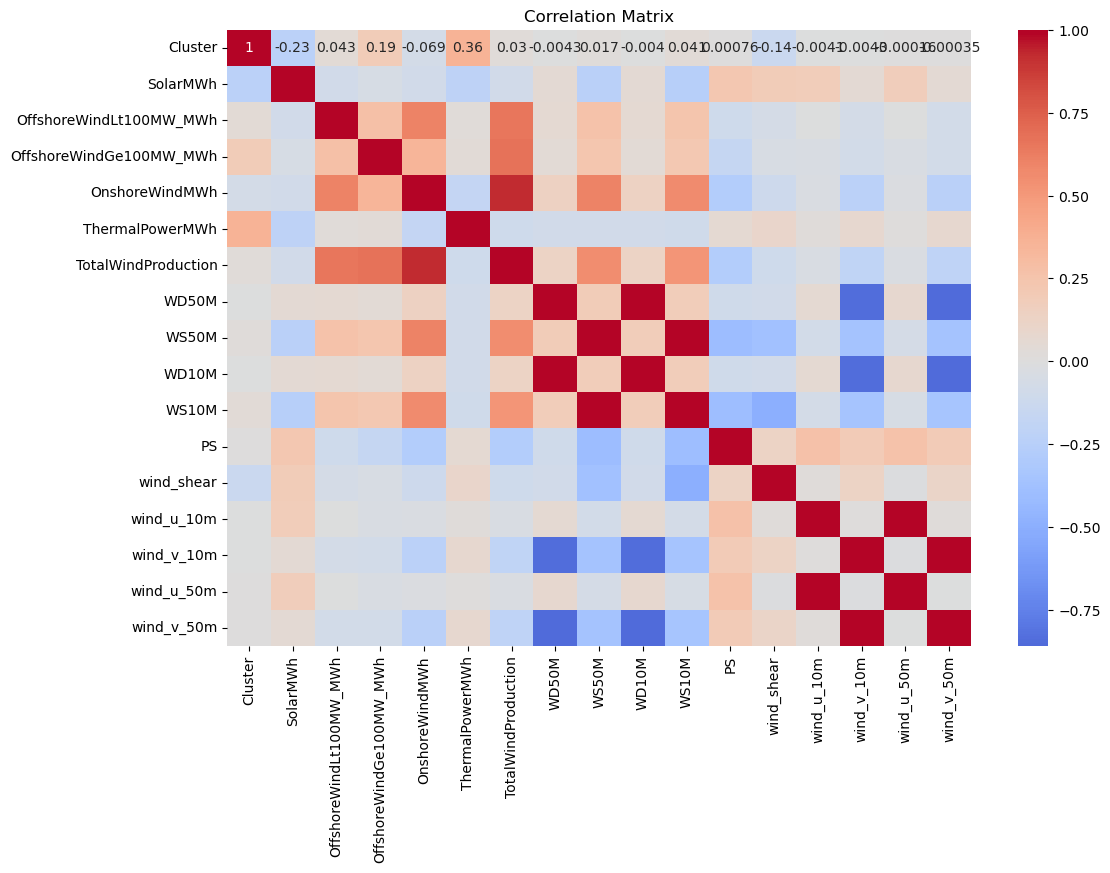

Cluster 1:
  Best Parameters: {'max_features': 'sqrt', 'n_estimators': 200}
  MSE Train: 10789.8082
  MSE Test: 252372.1334
  RMSE Train: 103.8740
  RMSE Test: 502.3665
  MAE Train: 75.5482
  MAE Test: 359.1647
  R² Train: 0.9936
  R² Test: 0.8761

Cluster 2:
  Best Parameters: {'max_features': 'sqrt', 'n_estimators': 100}
  MSE Train: 45289.7471
  MSE Test: 634219.0383
  RMSE Train: 212.8139
  RMSE Test: 796.3787
  MAE Train: 145.6754
  MAE Test: 572.6374
  R² Train: 0.9881
  R² Test: 0.8844

Cluster 3:
  Best Parameters: {'max_features': 'sqrt', 'n_estimators': 50}
  MSE Train: 471688.5200
  MSE Test: 10112799.6539
  RMSE Train: 686.7958
  RMSE Test: 3180.0628
  MAE Train: 489.2663
  MAE Test: 2322.9959
  R² Train: 0.9810
  R² Test: 0.6493

Cluster 4:
  Best Parameters: {'max_features': 1.0, 'n_estimators': 200}
  MSE Train: 11805.4330
  MSE Test: 263157.8528
  RMSE Train: 108.6528
  RMSE Test: 512.9891
  MAE Train: 71.7303
  MAE Test: 371.0596
  R² Train: 0.9924
  R² Test: 0.8889

C

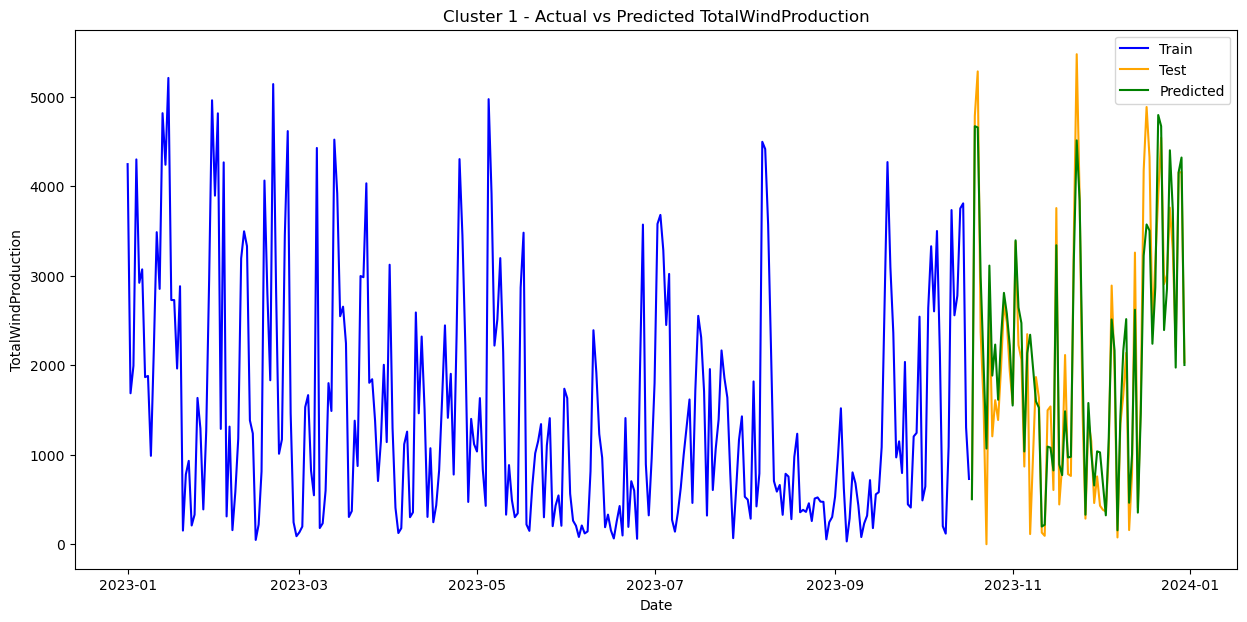

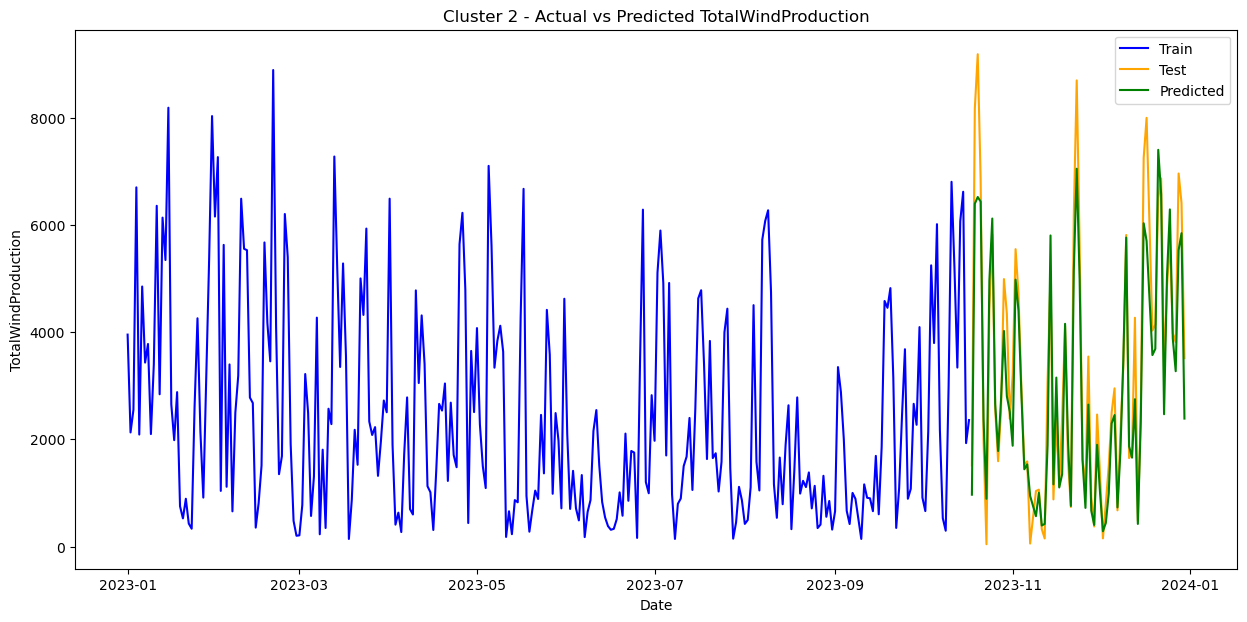

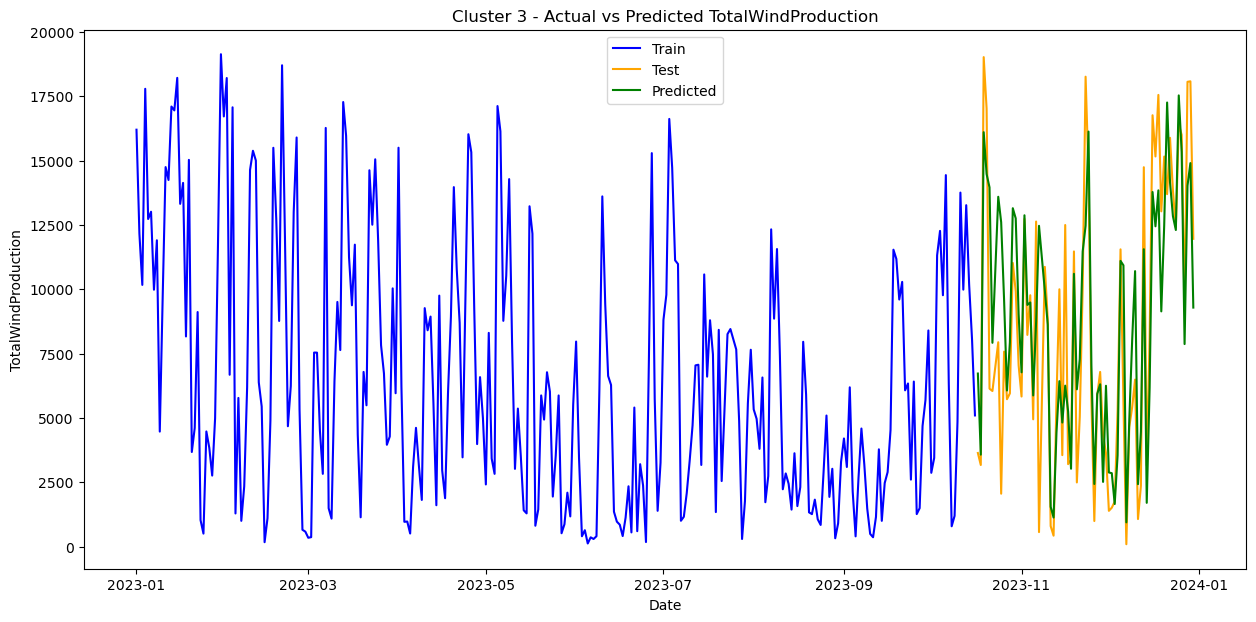

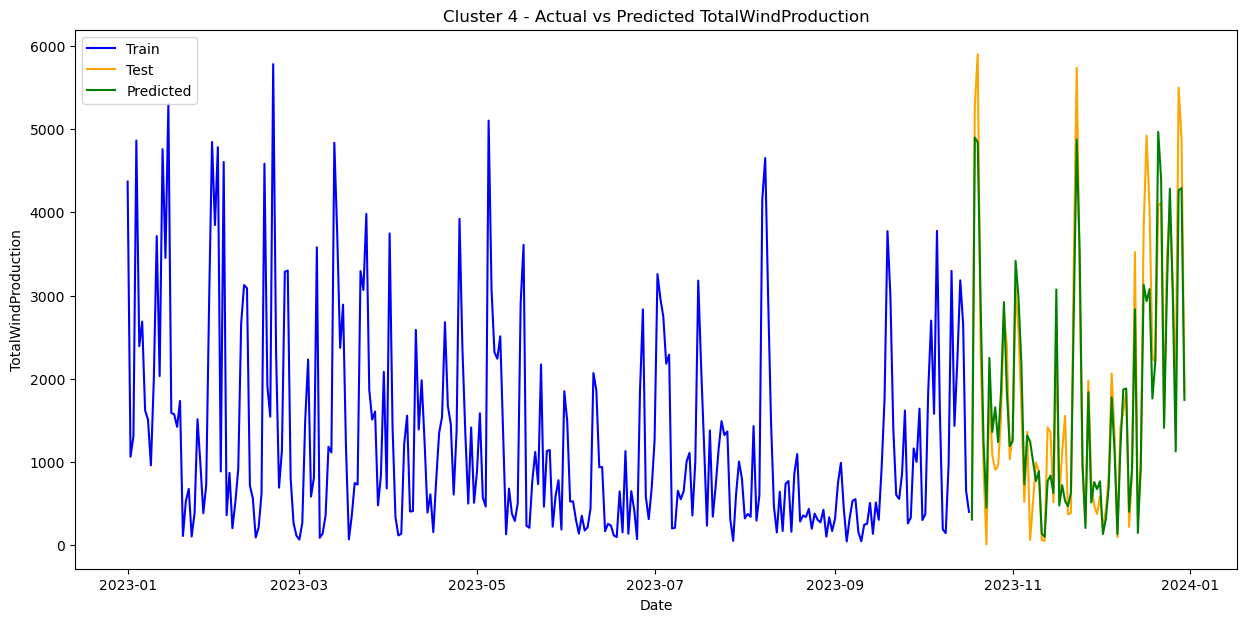

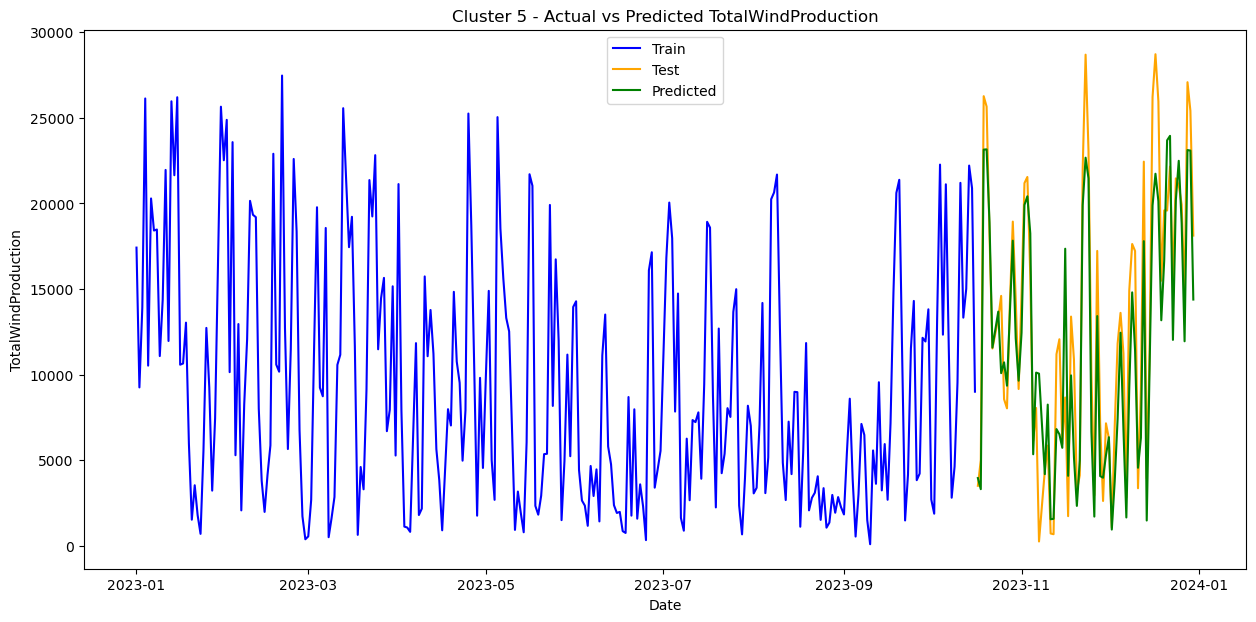

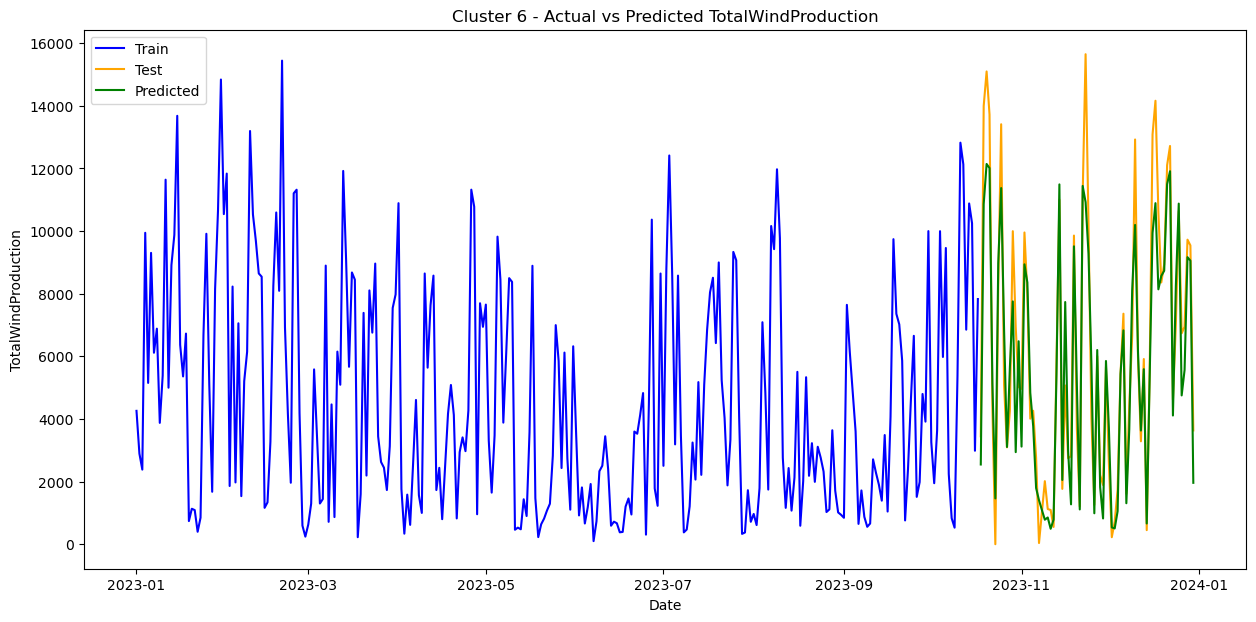

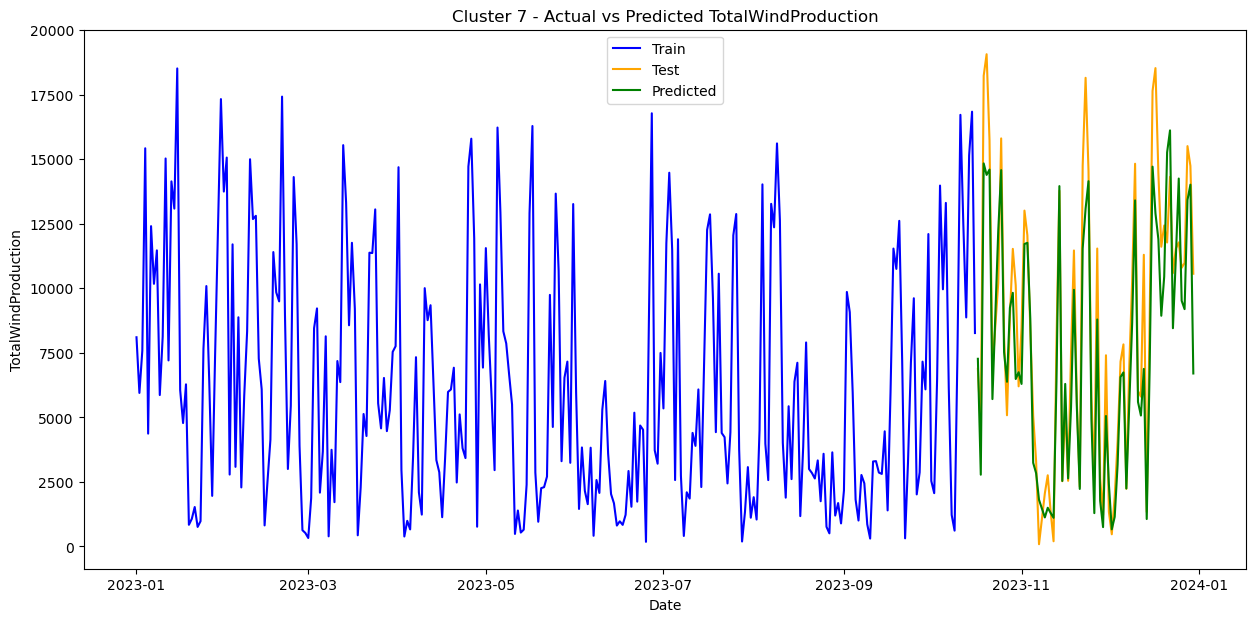

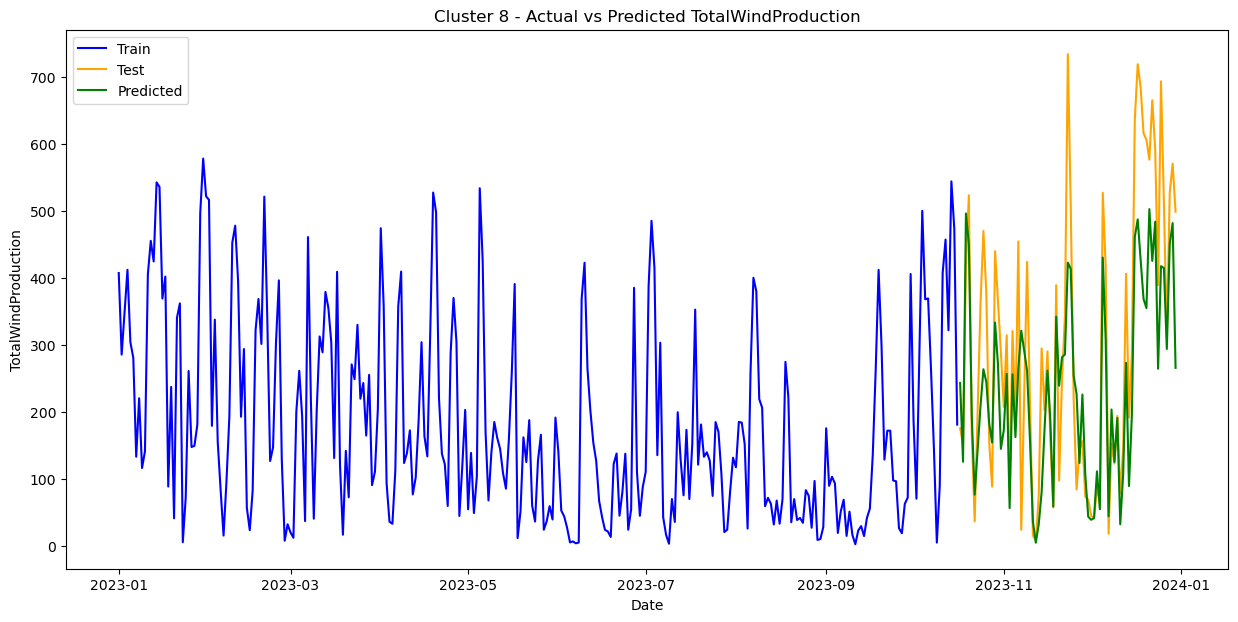

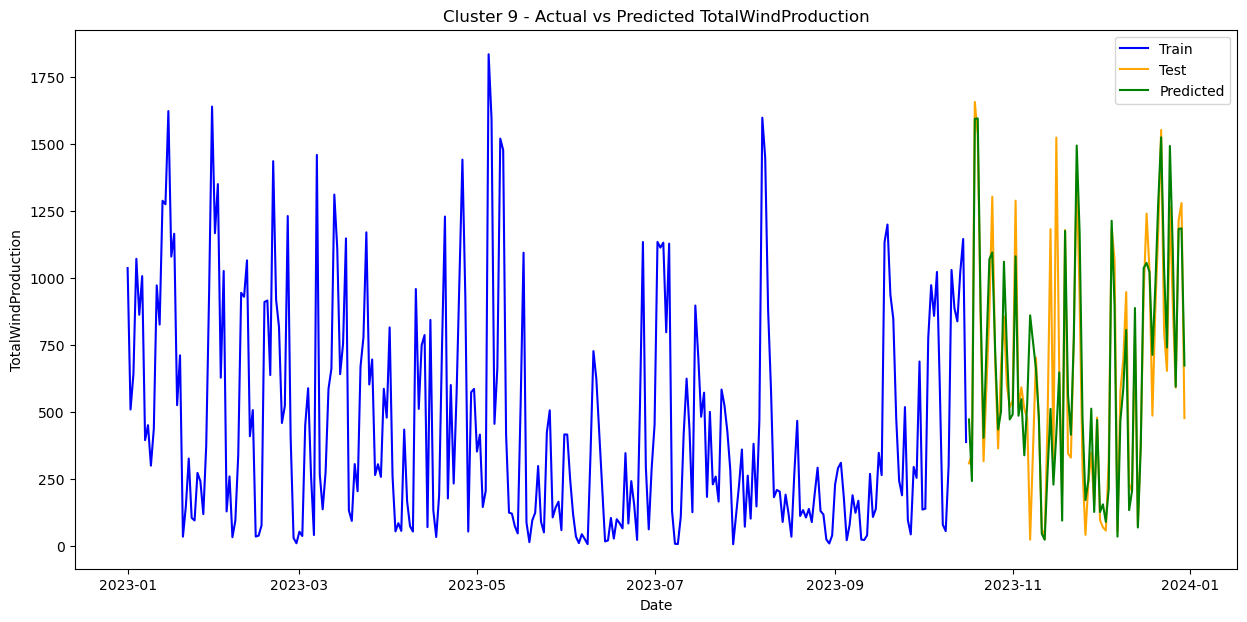

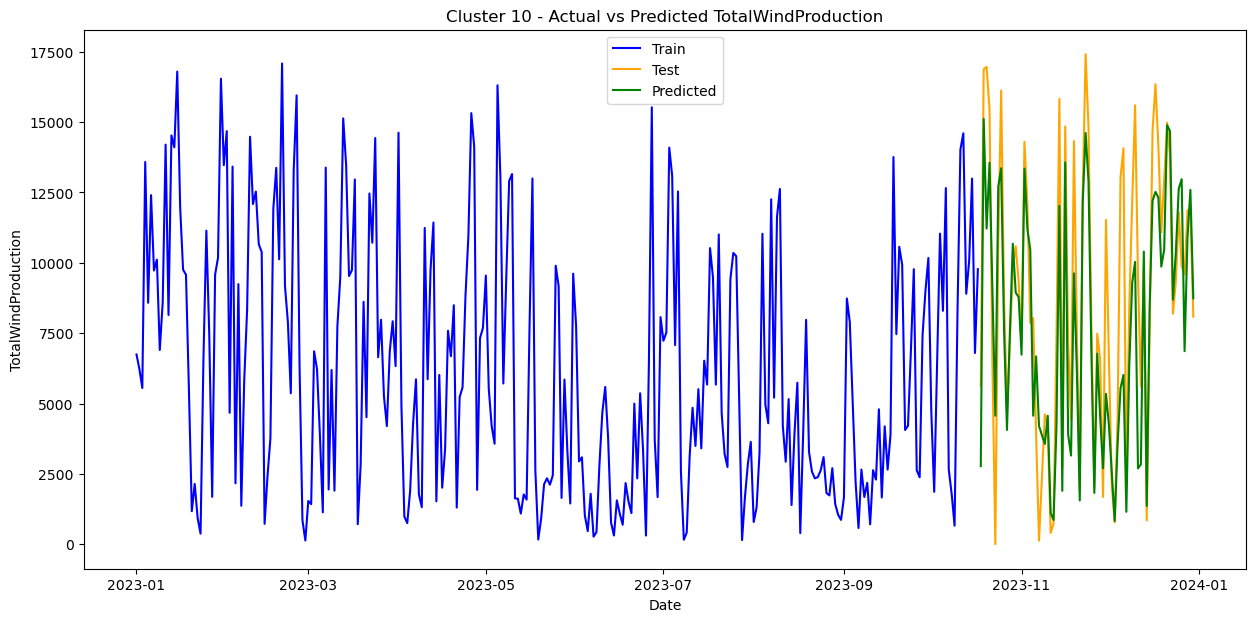

In [58]:
#import necessary packages used for randomforest
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np

# Load the dataset
file_path = '/Users/chiranthanyc/Documents/Documents/dissertation/daywise/clusterFinalData.csv'  # Update with your local path
data = pd.read_csv(file_path)

# Convert the Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data.set_index('Date', inplace=True)

# Sort the data by date to ensure it is sequential
data.sort_index(inplace=True)

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Extract the correlation of each feature with the target variable
target_correlation = correlation_matrix['TotalWindProduction']

# Identify weather-related features
weather_features = ['WD50M', 'WS50M', 'WD10M', 'WS10M', 'PS', 'wind_shear', 'wind_u_10m', 'wind_v_10m', 'wind_u_50m', 'wind_v_50m']

# Extract the correlation of weather-related features with the target variable
weather_target_correlation = target_correlation[weather_features]

# Display the correlation values
print("Correlation of weather-related features with TotalWindProduction:")
print(weather_target_correlation)

# Select weather-related features with high absolute correlation with the target variable
selected_weather_features = weather_target_correlation[abs(weather_target_correlation) > 0.2].index.tolist()
print("Selected weather-related features based on correlation:", selected_weather_features)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Function to calculate RMSE
def calculate_rmse(mse):
    """Calculate Root Mean Squared Error from Mean Squared Error."""
    return np.sqrt(mse)

# Method to train, evaluate and visualize random forest regression model for each cluster
def train_evaluate_visualize_rf(data, features, target, clusters, test_size=0.2, random_state=42, shuffle=False):
    results = {}

    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_features': ['sqrt', 'log2', 1.0]  # Replaced 'auto' with 1.0
    }

    for cluster in clusters:
        cluster_data = data[data['Cluster'] == cluster]

        if cluster_data.empty:
            print(f"Cluster {cluster} has no data.")
            continue

        X = cluster_data[features]
        y = cluster_data[target]

        # Split data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, shuffle=shuffle)

        # Hyperparameter tuning using GridSearchCV
        grid_search = GridSearchCV(RandomForestRegressor(random_state=random_state), param_grid, cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_

        # Make predictions
        y_pred_train = best_model.predict(X_train)
        y_pred_test = best_model.predict(X_test)

        # Evaluate the model
        mse_train = mean_squared_error(y_train, y_pred_train)
        mse_test = mean_squared_error(y_test, y_pred_test)
        rmse_train = calculate_rmse(mse_train)
        rmse_test = calculate_rmse(mse_test)
        mae_train = mean_absolute_error(y_train, y_pred_train)
        mae_test = mean_absolute_error(y_test, y_pred_test)
        r2_train = r2_score(y_train, y_pred_train)
        r2_test = r2_score(y_test, y_pred_test)

        results[cluster] = {
            'model': best_model,
            'mse_train': mse_train,
            'mse_test': mse_test,
            'rmse_train': rmse_train,
            'rmse_test': rmse_test,
            'mae_train': mae_train,
            'mae_test': mae_test,
            'r2_train': r2_train,
            'r2_test': r2_test,
            'y_train': y_train,
            'y_test': y_test,
            'y_pred_test': y_pred_test,
            'X_train': X_train,
            'X_test': X_test
        }

        print(f"Cluster {cluster}:")
        print(f"  Best Parameters: {grid_search.best_params_}")
        print(f"  MSE Train: {mse_train:.4f}")
        print(f"  MSE Test: {mse_test:.4f}")
        print(f"  RMSE Train: {rmse_train:.4f}")
        print(f"  RMSE Test: {rmse_test:.4f}")
        print(f"  MAE Train: {mae_train:.4f}")
        print(f"  MAE Test: {mae_test:.4f}")
        print(f"  R² Train: {r2_train:.4f}")
        print(f"  R² Test: {r2_test:.4f}")
        print()

    return results

# Train, evaluate and visualize Random Forest models by cluster using selected features
results_rf = train_evaluate_visualize_rf(data, selected_weather_features, 'TotalWindProduction', data['Cluster'].unique())

# Function to plot actual vs predicted values for each cluster
def plot_actual_vs_predicted(results_df):
    """
    Plot actual vs predicted values for each cluster.
    
    Parameters:
        results_df (dict): A dictionary with results for each cluster.
    """
    for cluster, result in results_df.items():
        y_train = result['y_train']
        y_test = result['y_test']
        y_pred_test = result['y_pred_test']
        X_train = result['X_train']
        X_test = result['X_test']

        plt.figure(figsize=(15, 7))
        plt.plot(X_train.index, y_train, label='Train', color='blue')
        plt.plot(X_test.index, y_test, label='Test', color='orange')
        plt.plot(X_test.index, y_pred_test, label='Predicted', color='green')
        plt.xlabel('Date')
        plt.ylabel('TotalWindProduction')
        plt.title(f'Cluster {cluster} - Actual vs Predicted TotalWindProduction')
        plt.legend()
        plt.show()

# Plot actual vs predicted values for each cluster
plot_actual_vs_predicted(results_rf)


Correlation of weather-related features with TotalWindProduction:
WD50M         0.128517
WS50M         0.555738
WD10M         0.126246
WS10M         0.518936
PS           -0.272393
wind_shear   -0.107156
wind_u_10m   -0.033840
wind_v_10m   -0.201916
wind_u_50m   -0.029747
wind_v_50m   -0.209516
Name: TotalWindProduction, dtype: float64
Selected weather-related features based on correlation: ['WS50M', 'WS10M', 'PS', 'wind_v_10m', 'wind_v_50m']


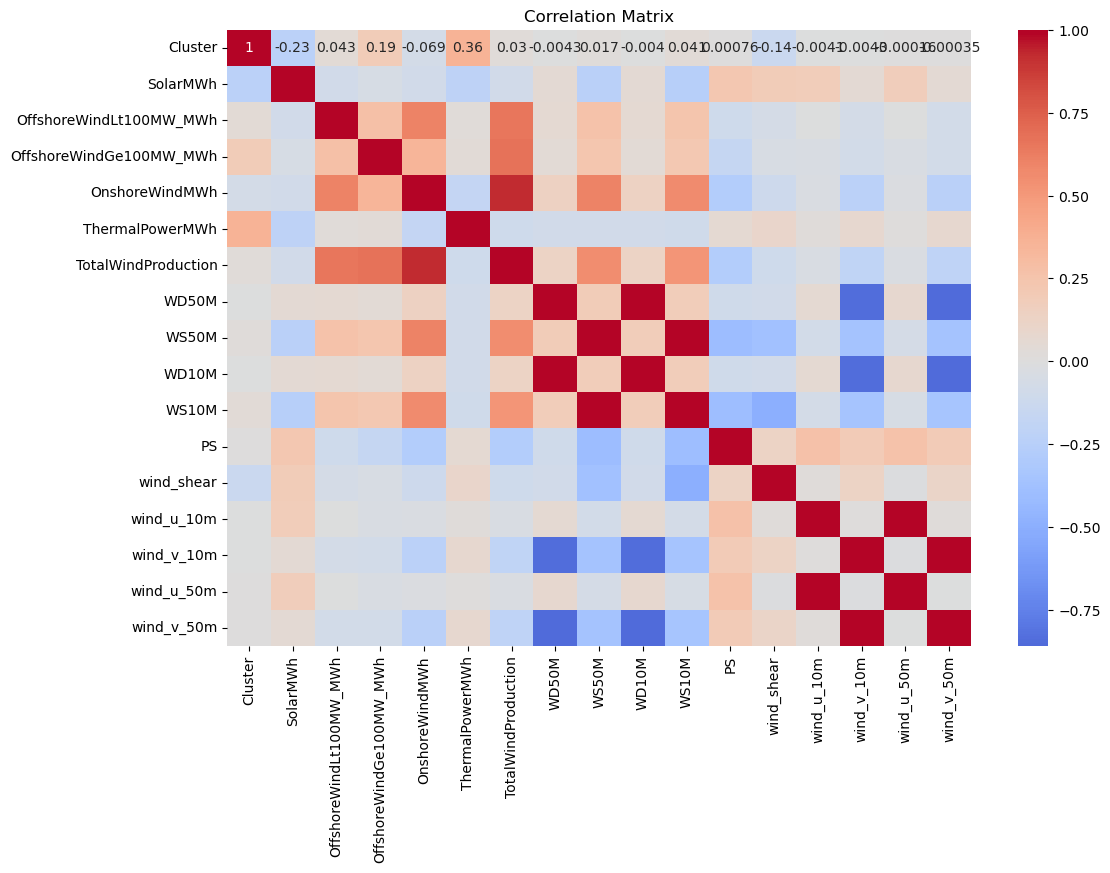

Cluster 1:
  Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
  MSE Train: 25421.0264
  MSE Test: 272461.2262
  RMSE Train: 159.4397
  RMSE Test: 521.9782
  MAE Train: 123.8039
  MAE Test: 374.7640
  R² Train: 0.9849
  R² Test: 0.8663

Cluster 2:
  Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
  MSE Train: 89479.8724
  MSE Test: 620615.1215
  RMSE Train: 299.1319
  RMSE Test: 787.7913
  MAE Train: 234.2513
  MAE Test: 588.7502
  R² Train: 0.9765
  R² Test: 0.8869

Cluster 3:
  Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
  MSE Train: 1252159.0844
  MSE Test: 10200140.6794
  RMSE Train: 1118.9991
  RMSE Test: 3193.7659
  MAE Train: 845.9118
  MAE Test: 2397.4328
  R² Train: 0.9495
  R² Test: 0.6462

Cluster 4:
  Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
  MSE Train: 12033.9107
  MSE Test: 277609

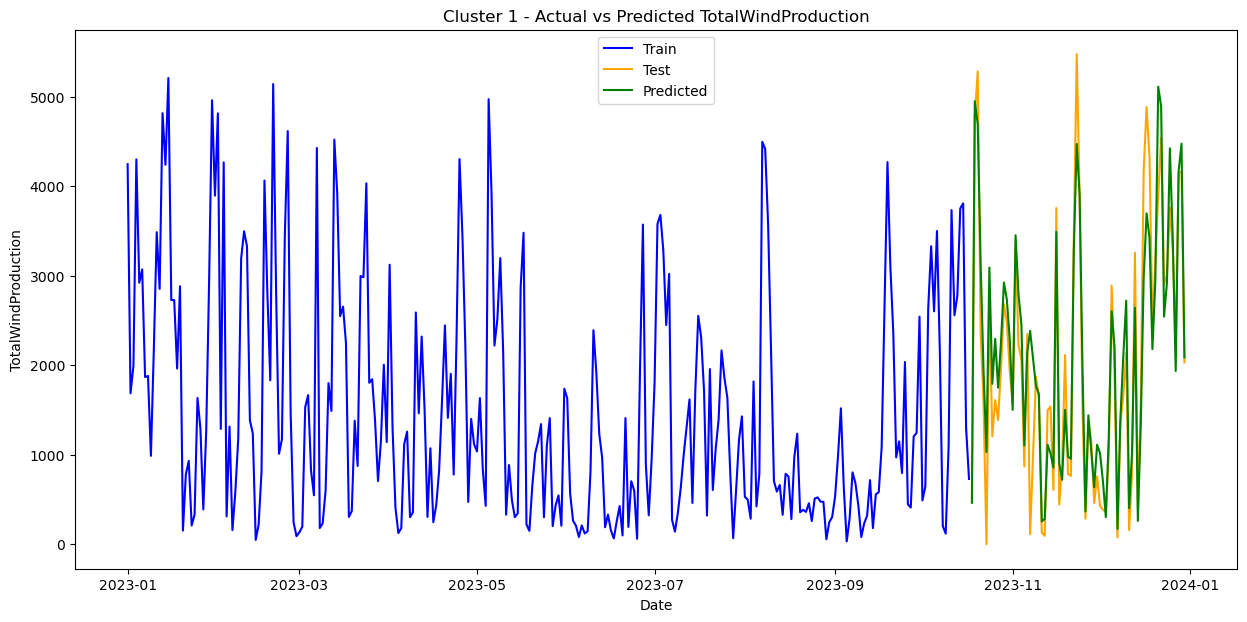

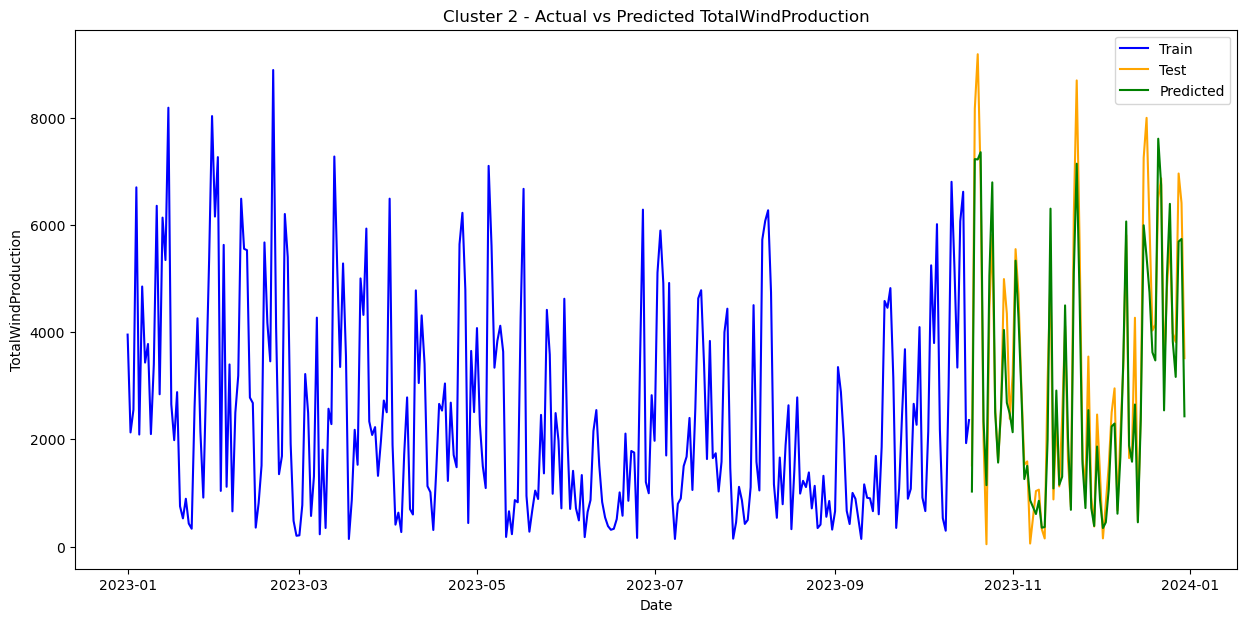

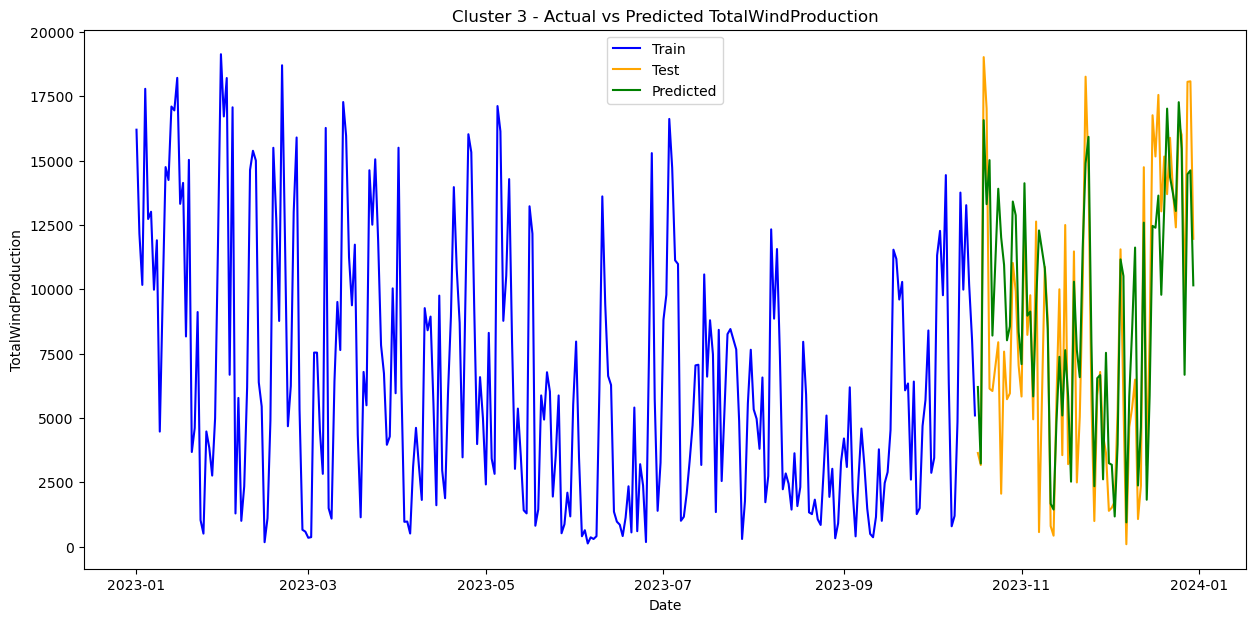

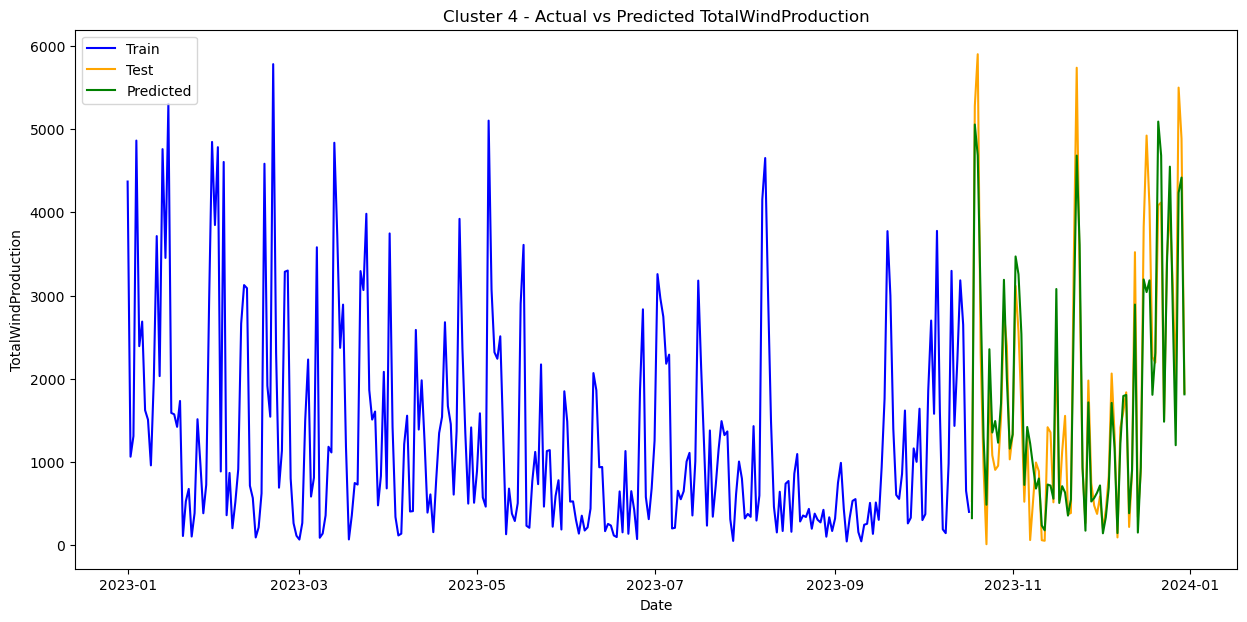

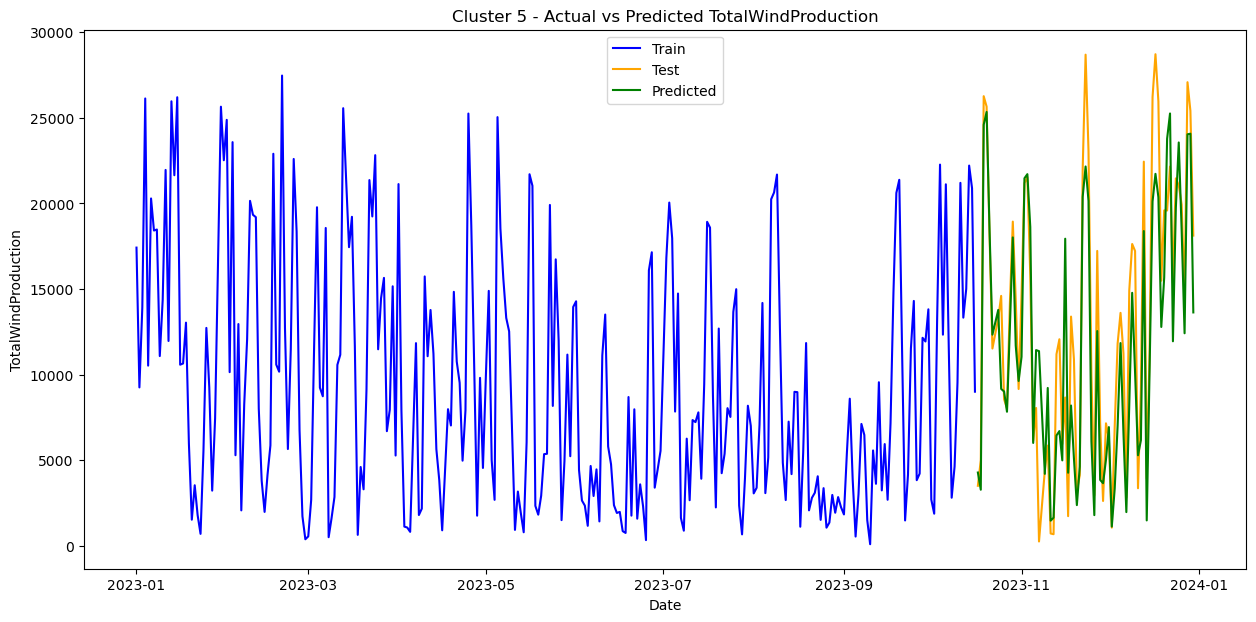

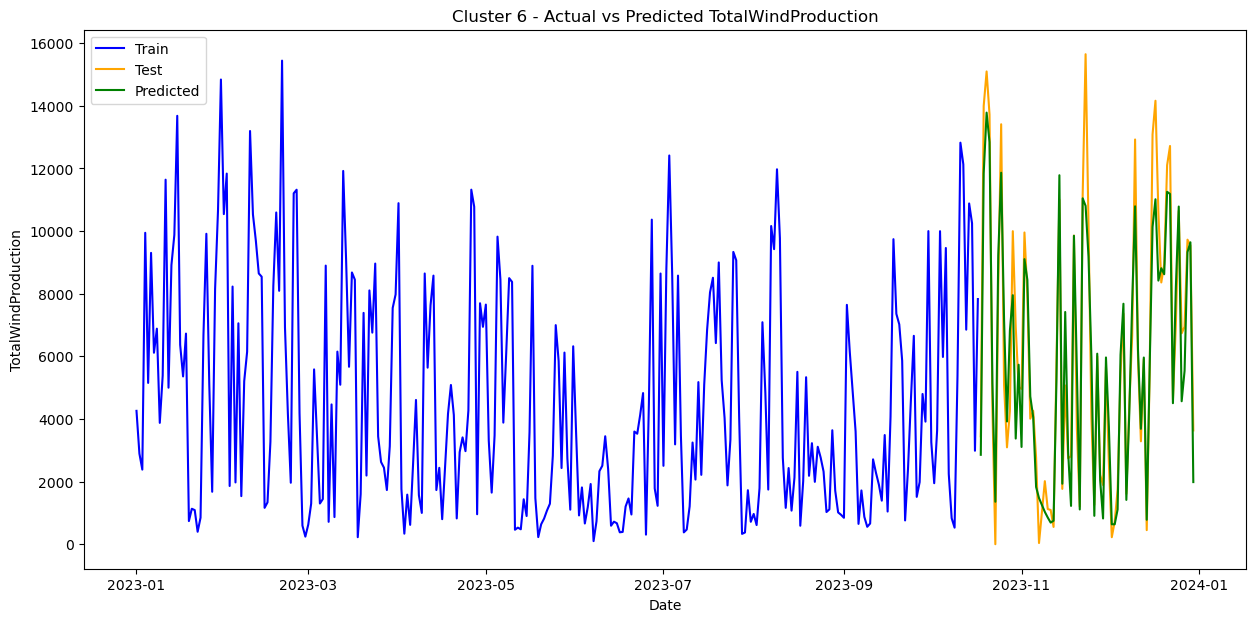

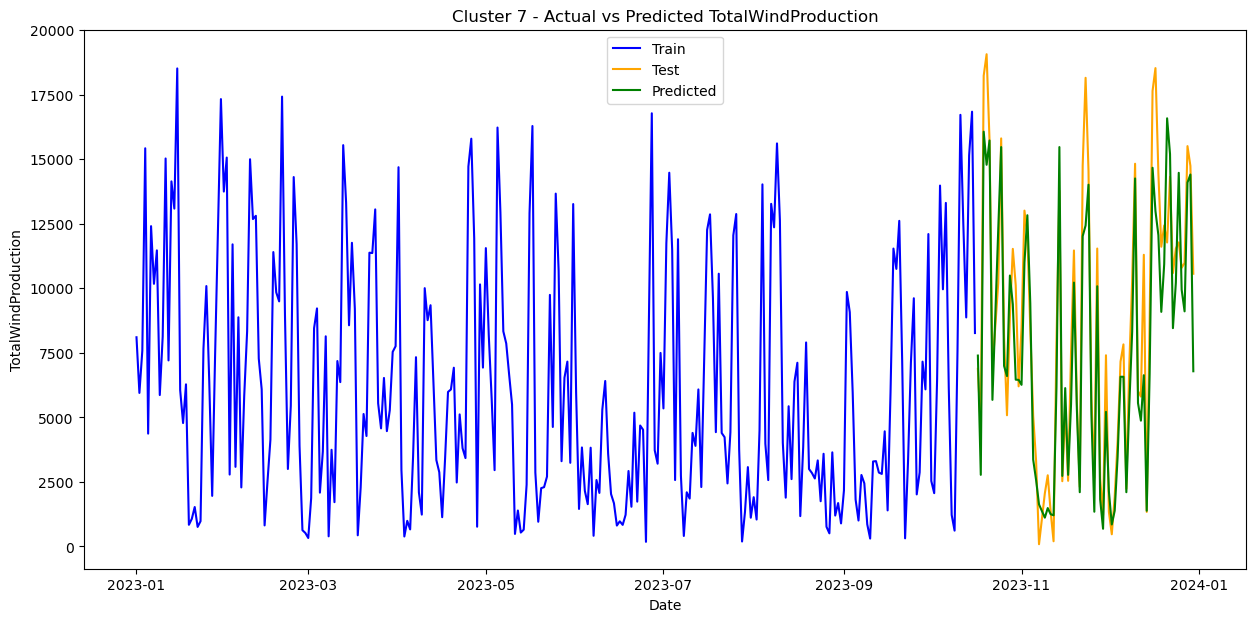

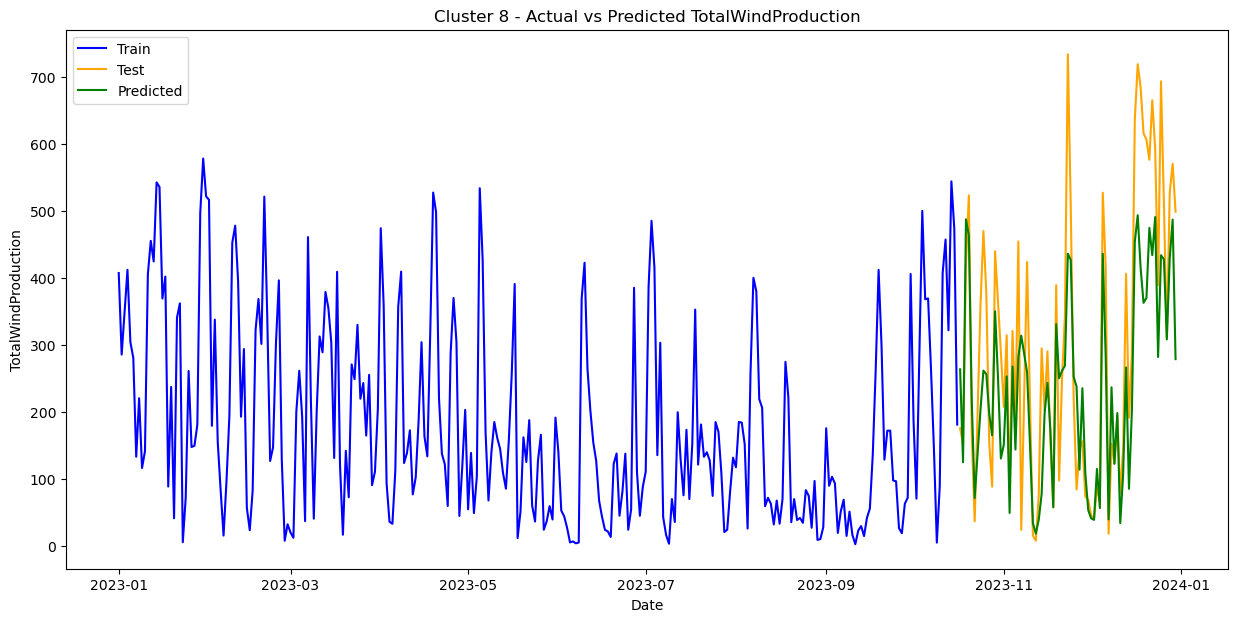

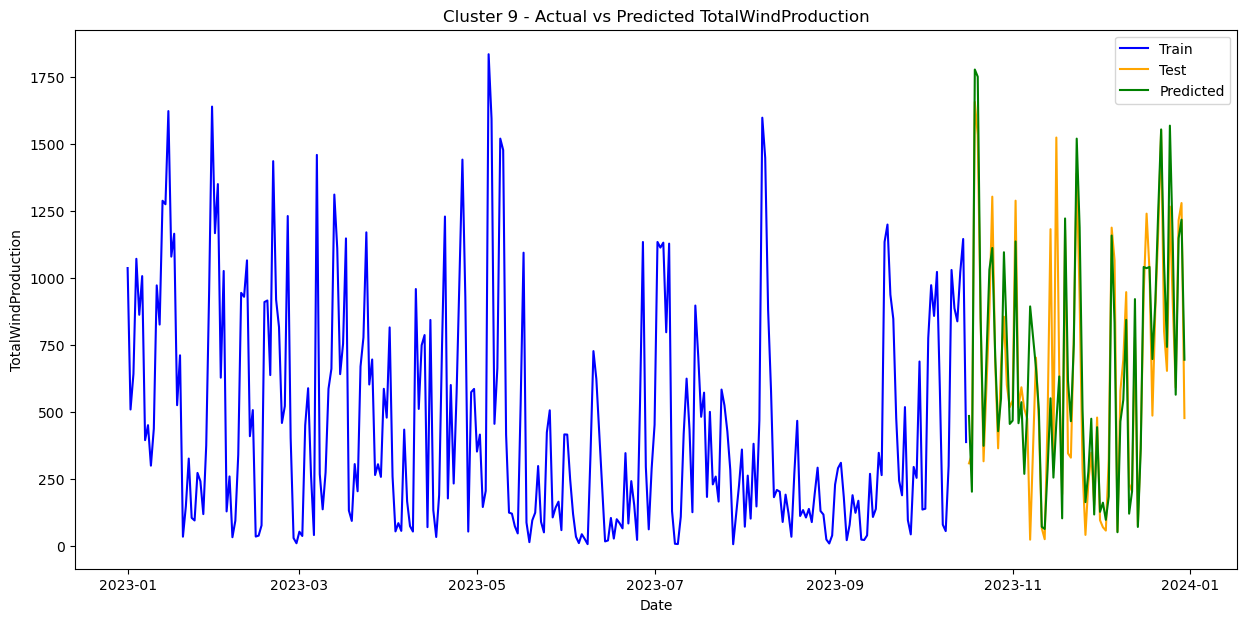

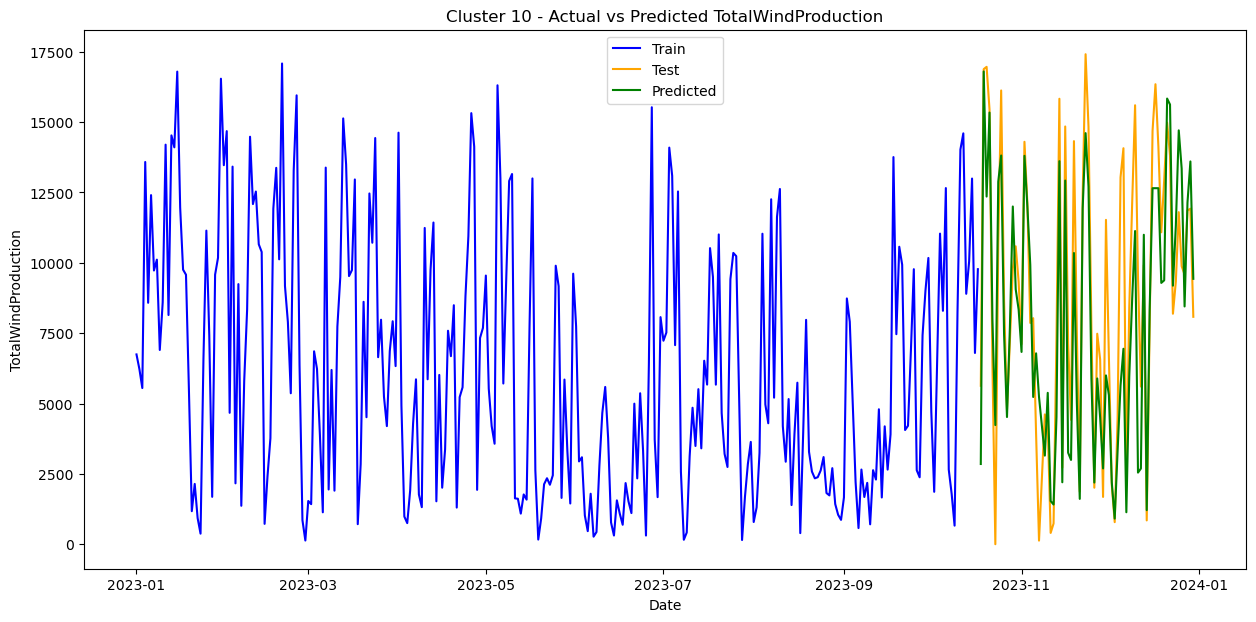

In [2]:
#import necessary packages needed for gradient boosting regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns

# Load the dataset
file_path = '/Users/chiranthanyc/Documents/Documents/dissertation/daywise/clusterFinalData.csv'  # Update with your local path
data = pd.read_csv(file_path)

# Convert the Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data.set_index('Date', inplace=True)

# Sort the data by date to ensure it is sequential
data.sort_index(inplace=True)

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Extract the correlation of each feature with the target variable
target_correlation = correlation_matrix['TotalWindProduction']

# Identify weather-related features
weather_features = ['WD50M', 'WS50M', 'WD10M', 'WS10M', 'PS', 'wind_shear', 'wind_u_10m', 'wind_v_10m', 'wind_u_50m', 'wind_v_50m']

# Extract correlation of weather-related features with target variable
weather_target_correlation = target_correlation[weather_features]

# print correlation values
print("Correlation of weather-related features with TotalWindProduction:")
print(weather_target_correlation)

# Select weather-related features with high absolute correlation with the target variable
selected_weather_features = weather_target_correlation[abs(weather_target_correlation) > 0.2].index.tolist()
print("Selected weather-related features based on correlation:", selected_weather_features)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Function to calculate RMSE
def calculate_rmse(mse):
    """Calculate Root Mean Squared Error from Mean Squared Error."""
    return np.sqrt(mse)

# Function to train, evaluate and visualize a Gradient Boosting regression model for each cluster
def train_evaluate_visualize_gbr(data, features, target, clusters, test_size=0.2, random_state=42, shuffle=False):
    results = {}

    #paramters for best setting in gradient boosting
    param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5],
        'subsample': [0.8, 0.9, 1.0]
    }

    for cluster in clusters:
        cluster_data = data[data['Cluster'] == cluster]

        if cluster_data.empty:
            print(f"Cluster {cluster} has no data.")
            continue

        X = cluster_data[features]
        y = cluster_data[target]

        # Split data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, shuffle=shuffle)

        # Hyperparameter tuning using GridSearchCV
        grid_search = GridSearchCV(GradientBoostingRegressor(random_state=random_state), param_grid, cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_

        # Make predictions
        y_pred_train = best_model.predict(X_train)
        y_pred_test = best_model.predict(X_test)

        # Evaluate the model
        mse_train = mean_squared_error(y_train, y_pred_train)
        mse_test = mean_squared_error(y_test, y_pred_test)
        rmse_train = calculate_rmse(mse_train)
        rmse_test = calculate_rmse(mse_test)
        mae_train = mean_absolute_error(y_train, y_pred_train)
        mae_test = mean_absolute_error(y_test, y_pred_test)
        r2_train = r2_score(y_train, y_pred_train)
        r2_test = r2_score(y_test, y_pred_test)

        results[cluster] = {
            'model': best_model,
            'mse_train': mse_train,
            'mse_test': mse_test,
            'rmse_train': rmse_train,
            'rmse_test': rmse_test,
            'mae_train': mae_train,
            'mae_test': mae_test,
            'r2_train': r2_train,
            'r2_test': r2_test,
            'y_train': y_train,
            'y_test': y_test,
            'y_pred_test': y_pred_test,
            'X_train': X_train,
            'X_test': X_test
        }

        print(f"Cluster {cluster}:")
        print(f"  Best Parameters: {grid_search.best_params_}")
        print(f"  MSE Train: {mse_train:.4f}")
        print(f"  MSE Test: {mse_test:.4f}")
        print(f"  RMSE Train: {rmse_train:.4f}")
        print(f"  RMSE Test: {rmse_test:.4f}")
        print(f"  MAE Train: {mae_train:.4f}")
        print(f"  MAE Test: {mae_test:.4f}")
        print(f"  R² Train: {r2_train:.4f}")
        print(f"  R² Test: {r2_test:.4f}")
        print()

    return results

# Train, evaluate and visualize Gradient Boosting models by cluster using selected features
results_gbr = train_evaluate_visualize_gbr(data, selected_weather_features, 'TotalWindProduction', data['Cluster'].unique())

# Function to plot actual vs predicted values for each cluster
def plot_actual_vs_predicted(results_df):
    for cluster, result in results_df.items():
        y_train = result['y_train']
        y_test = result['y_test']
        y_pred_test = result['y_pred_test']
        X_train = result['X_train']
        X_test = result['X_test']

        plt.figure(figsize=(15, 7))
        plt.plot(X_train.index, y_train, label='Train', color='blue')
        plt.plot(X_test.index, y_test, label='Test', color='orange')
        plt.plot(X_test.index, y_pred_test, label='Predicted', color='green')
        plt.xlabel('Date')
        plt.ylabel('TotalWindProduction')
        plt.title(f'Cluster {cluster} - Actual vs Predicted TotalWindProduction')
        plt.legend()
        plt.show()

# Plot actual vs predicted values for each cluster
plot_actual_vs_predicted(results_gbr)


Selected weather-related features based on correlation: ['WS50M', 'WS10M', 'PS', 'wind_v_10m', 'wind_v_50m']
Cluster 1 - Stacking - MSE Train: 23068.9571, MSE Test: 259773.1407
Stacking - R² Train: 0.9863, R² Test: 0.8725
Cluster 2 - Stacking - MSE Train: 88401.0974, MSE Test: 556687.3569
Stacking - R² Train: 0.9767, R² Test: 0.8985
Cluster 3 - Stacking - MSE Train: 1470370.3372, MSE Test: 9666964.2296
Stacking - R² Train: 0.9407, R² Test: 0.6647
Cluster 4 - Stacking - MSE Train: 16390.3892, MSE Test: 254518.7998
Stacking - R² Train: 0.9894, R² Test: 0.8925
Cluster 5 - Stacking - MSE Train: 880150.7089, MSE Test: 10875727.5364
Stacking - R² Train: 0.9822, R² Test: 0.8251
Cluster 6 - Stacking - MSE Train: 247786.9800, MSE Test: 2118617.4918
Stacking - R² Train: 0.9804, R² Test: 0.8814
Cluster 7 - Stacking - MSE Train: 463510.5410, MSE Test: 3739986.7524
Stacking - R² Train: 0.9784, R² Test: 0.8587
Cluster 8 - Stacking - MSE Train: 823.5336, MSE Test: 14217.6725
Stacking - R² Train: 0.96

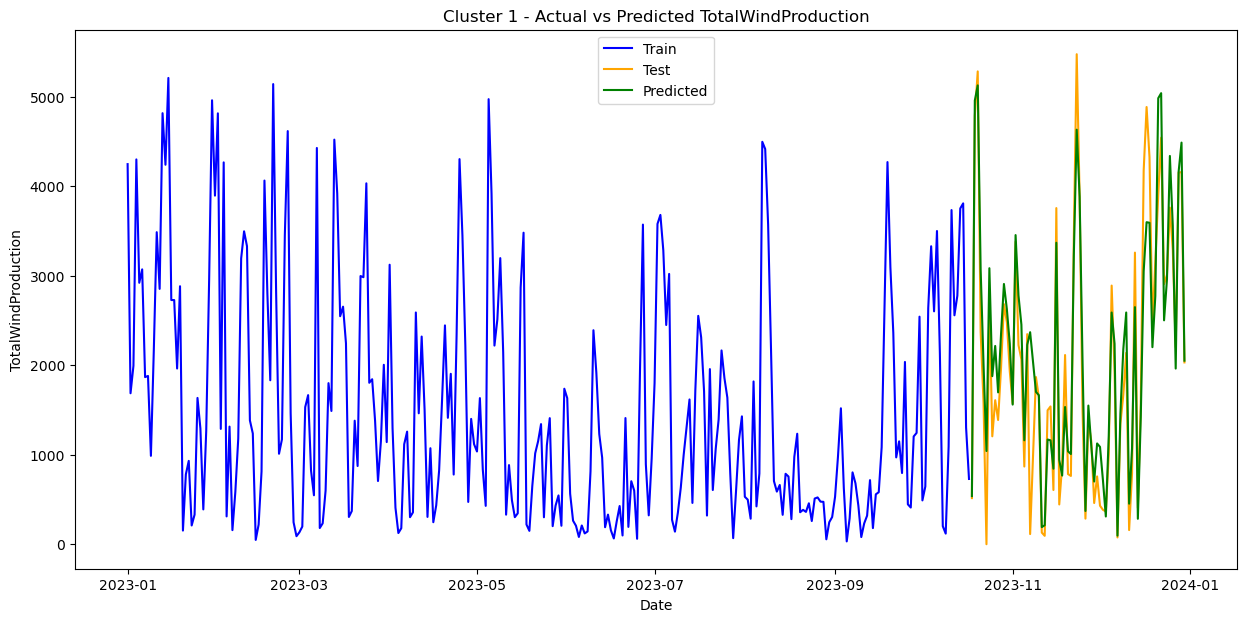

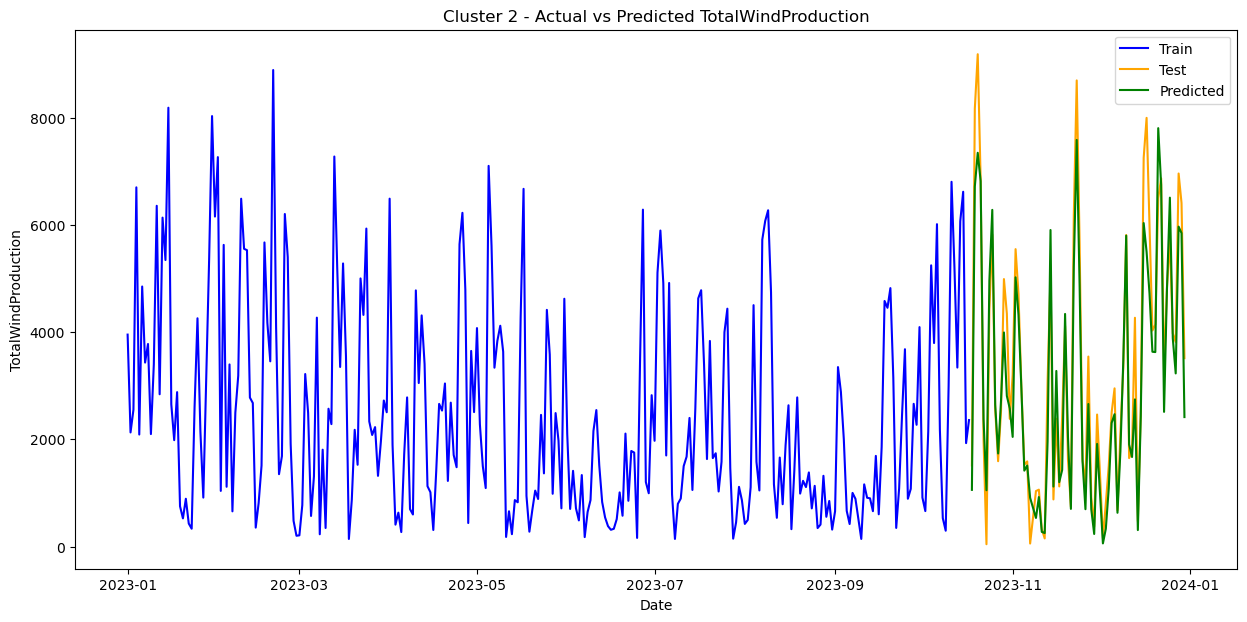

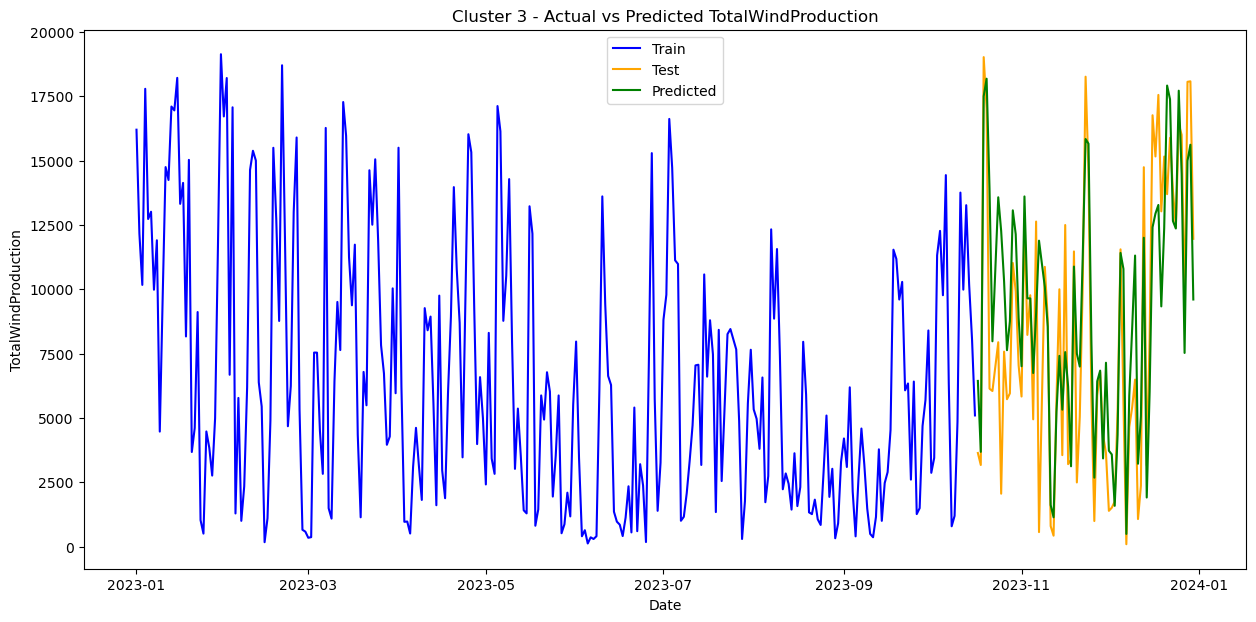

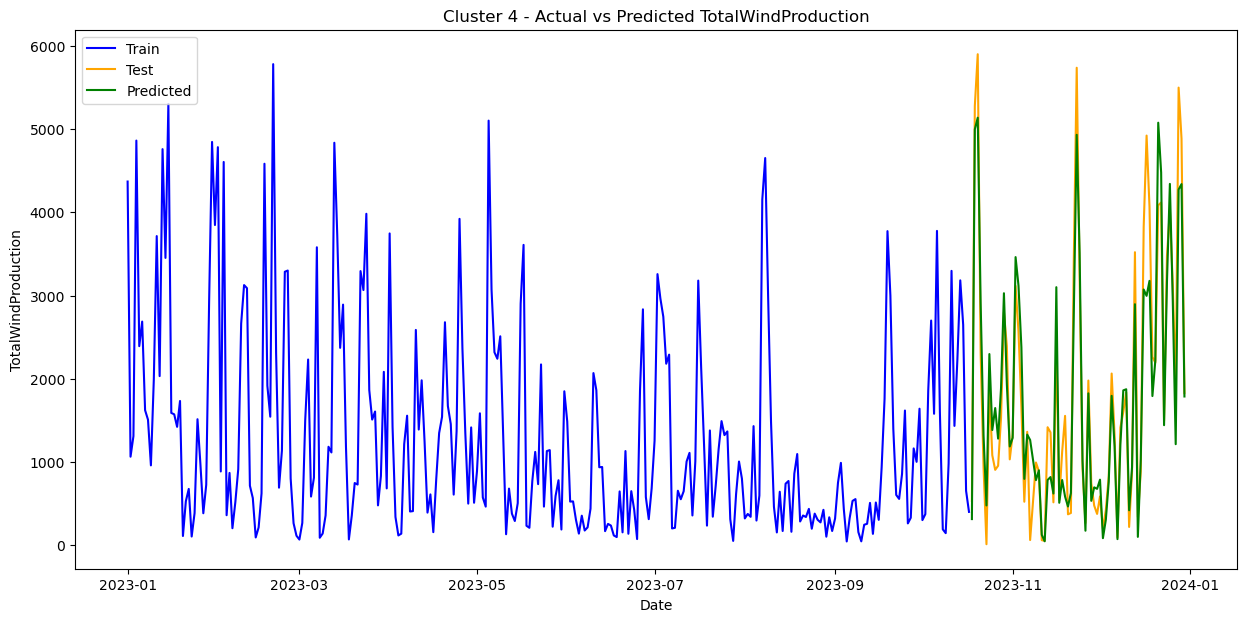

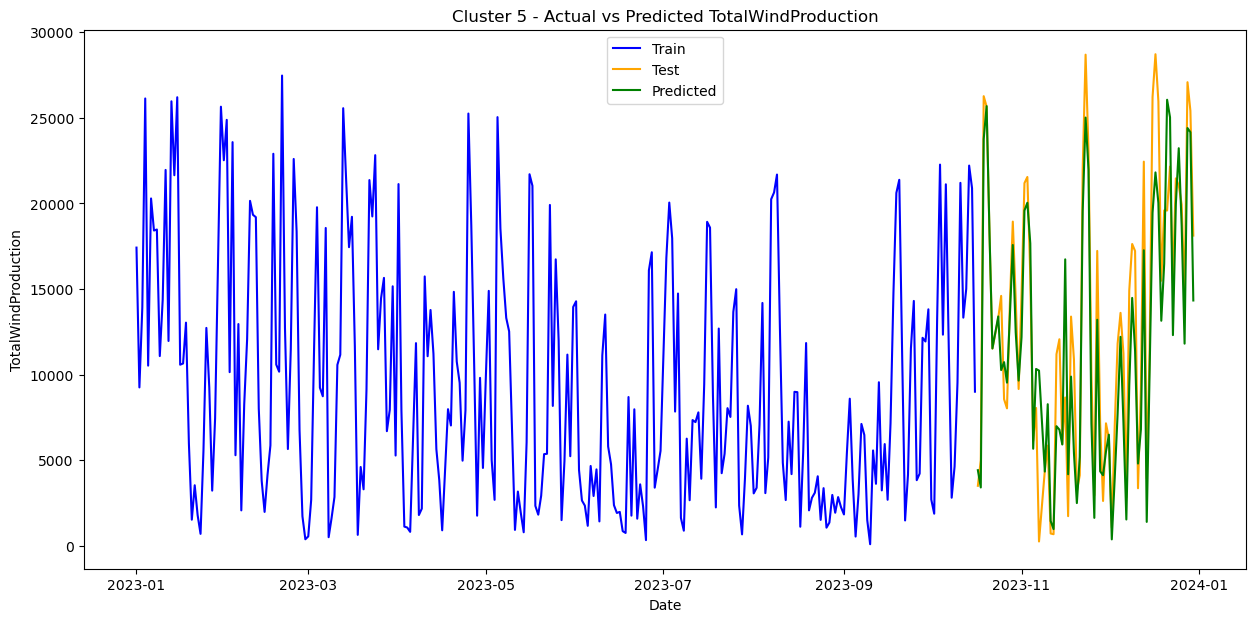

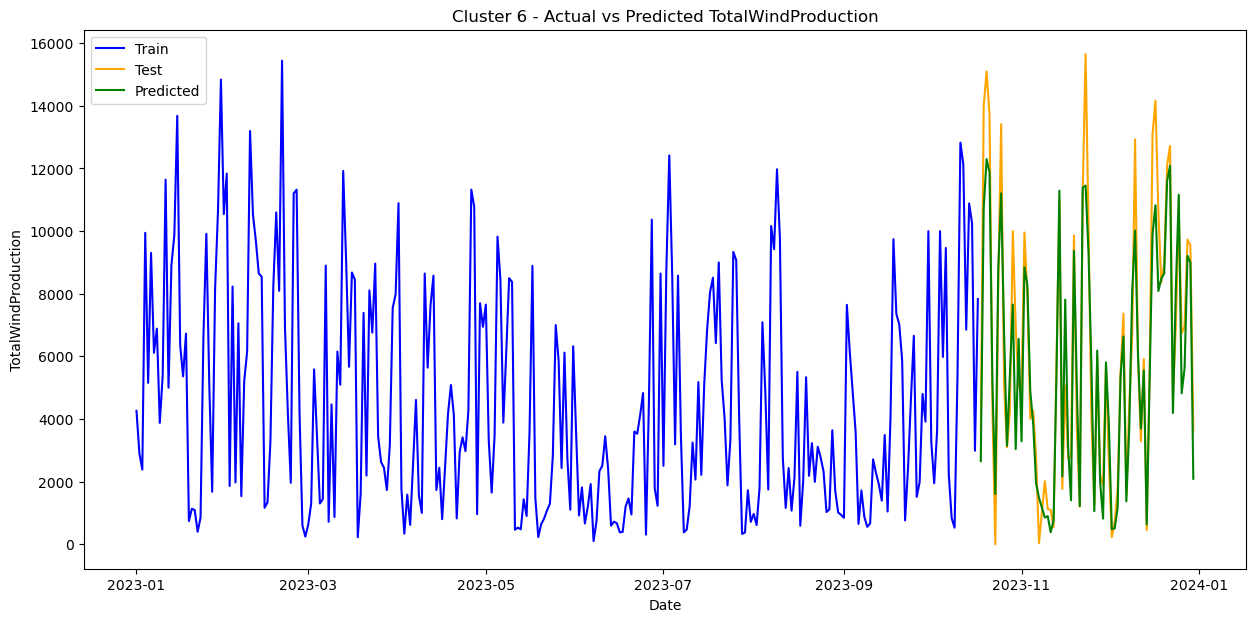

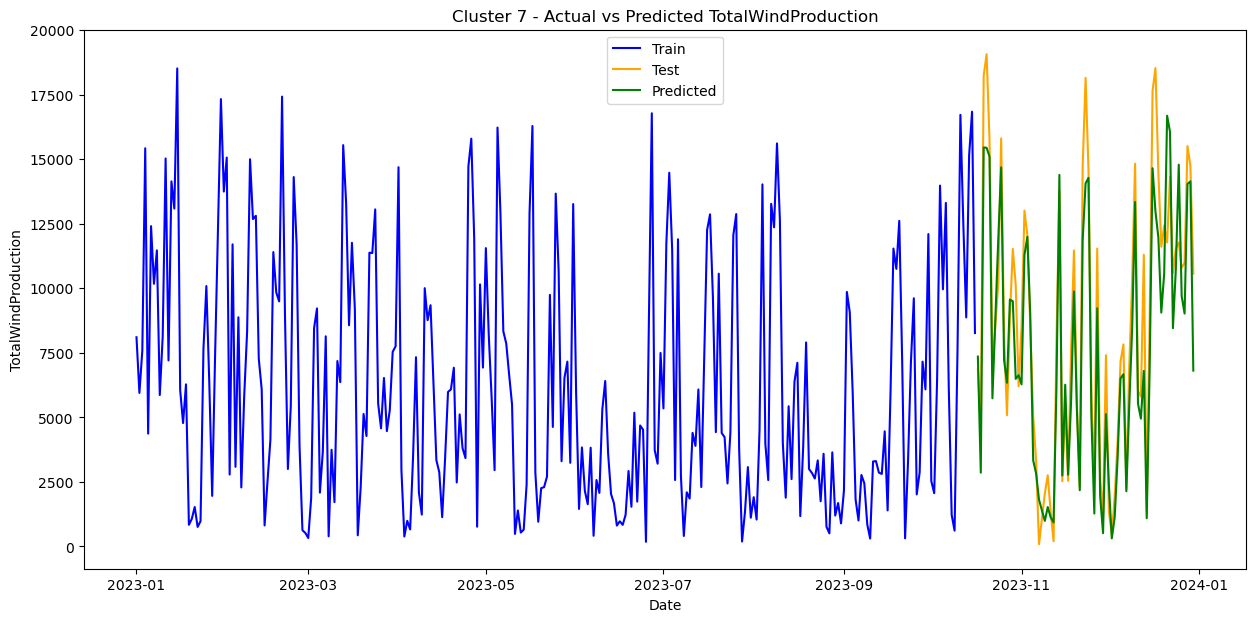

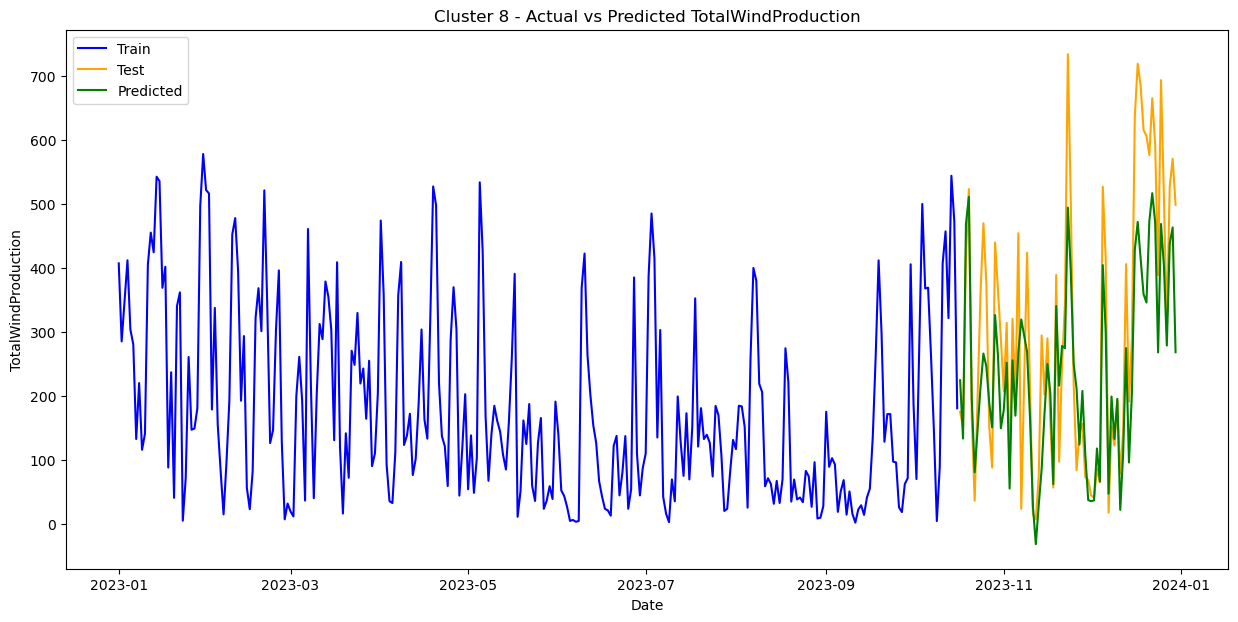

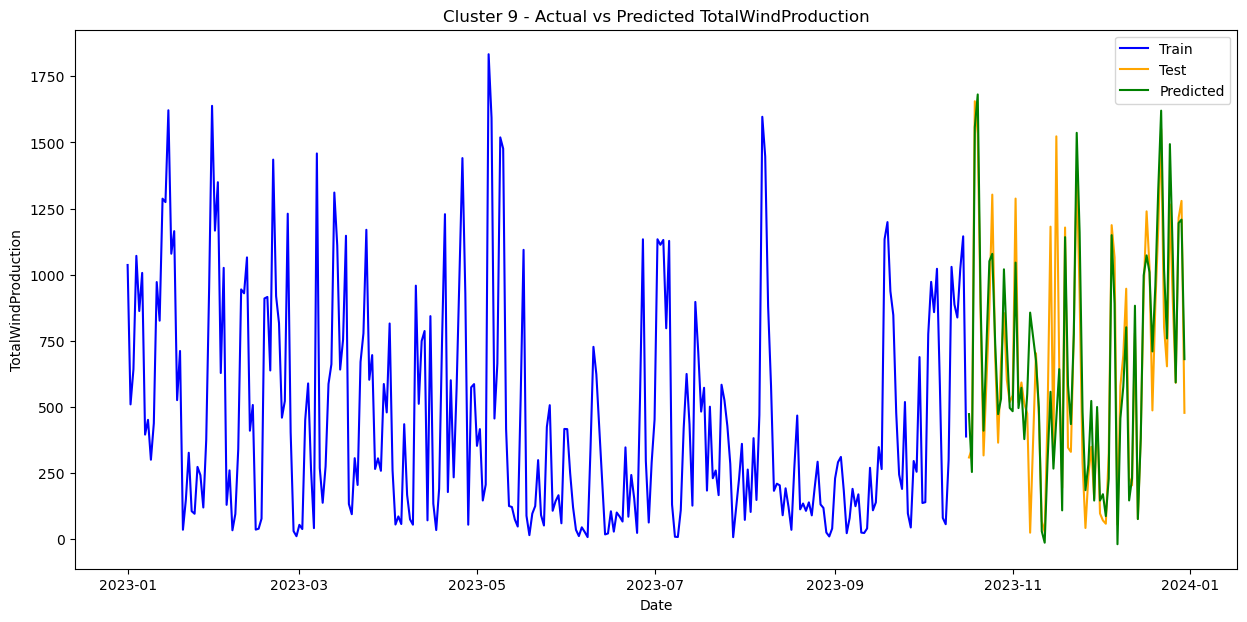

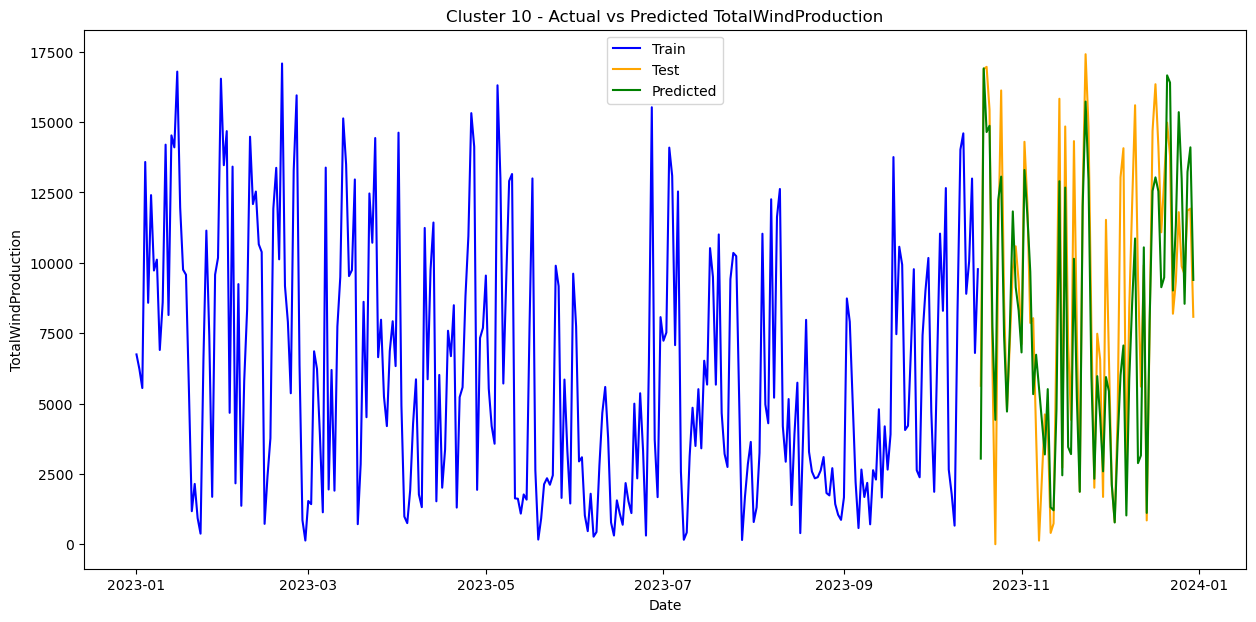

In [60]:
#import necessary packages required for ensemble methods
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, StackingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Load the dataset
file_path = '/Users/chiranthanyc/Documents/Documents/dissertation/daywise/clusterFinalData.csv'  # Update with your local path
data = pd.read_csv(file_path)

# Convert the Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data.set_index('Date', inplace=True)

# Handle missing values
data = data.dropna()

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Extract the correlation of each feature with the target variable
target_correlation = correlation_matrix['TotalWindProduction']

# Identify weather-related features
weather_features = ['WD50M', 'WS50M', 'WD10M', 'WS10M', 'PS', 'wind_shear', 'wind_u_10m', 'wind_v_10m', 'wind_u_50m', 'wind_v_50m']

# Extract the correlation of weather-related features with the target variable
weather_target_correlation = target_correlation[weather_features]

# Select weather-related features with high absolute correlation with the target variable
selected_weather_features = weather_target_correlation[abs(weather_target_correlation) > 0.2].index.tolist()
print("Selected weather-related features based on correlation:", selected_weather_features)

# Function to calculate RMSE
def calculate_rmse(mse):
    return np.sqrt(mse)

# Function to train, evaluate, and visualize the stacking ensemble model for each cluster
def train_evaluate_visualize_stacking(data, features, target, clusters, test_size=0.2, random_state=42, shuffle=False):
    results = {}

    for cluster in clusters:
        cluster_data = data[data['Cluster'] == cluster]

        if cluster_data.empty:
            print(f"Cluster {cluster} has no data.")
            continue

        X = cluster_data[features]
        y = cluster_data[target]

        # Split data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, shuffle=shuffle)
        train_indices = X_train.index  # Store the indices for plotting
        test_indices = X_test.index  # Store the indices for plotting

        # Normalize the features
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        ### Hyperparameter tuning for base models
        param_grid_rf = {
            'n_estimators': [50, 100, 200],
            'max_features': [1.0, 'sqrt', 'log2']
        }
        grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=random_state), param_grid_rf, cv=5, scoring='neg_mean_squared_error')
        grid_search_rf.fit(X_train, y_train)
        best_rf_model = grid_search_rf.best_estimator_

        param_grid_gbr = {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 4, 5]
        }
        grid_search_gbr = GridSearchCV(GradientBoostingRegressor(random_state=random_state), param_grid_gbr, cv=5, scoring='neg_mean_squared_error')
        grid_search_gbr.fit(X_train, y_train)
        best_gbr_model = grid_search_gbr.best_estimator_

        param_grid_svr = {
            'kernel': ['linear', 'rbf'],
            'C': [1, 10, 100],
            'epsilon': [0.1, 0.2, 0.5]
        }
        grid_search_svr = GridSearchCV(SVR(), param_grid_svr, cv=5, scoring='neg_mean_squared_error')
        grid_search_svr.fit(X_train, y_train)
        best_svr_model = grid_search_svr.best_estimator_

        ### Model 4: Stacking Ensemble with Ridge Regression as Meta-Learner
        base_models = [
            ('rf', best_rf_model),
            ('gbr', best_gbr_model),
            ('svr', best_svr_model)
        ]
        meta_learner = Ridge()
        stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_learner)
        stacking_model.fit(X_train, y_train)
        y_pred_train_stacking = stacking_model.predict(X_train)
        y_pred_test_stacking = stacking_model.predict(X_test)
        mse_train_stacking = mean_squared_error(y_train, y_pred_train_stacking)
        mse_test_stacking = mean_squared_error(y_test, y_pred_test_stacking)
        rmse_train_stacking = calculate_rmse(mse_train_stacking)
        rmse_test_stacking = calculate_rmse(mse_test_stacking)
        r2_train_stacking = r2_score(y_train, y_pred_train_stacking)
        r2_test_stacking = r2_score(y_test, y_pred_test_stacking)
        print(f"Cluster {cluster} - Stacking - MSE Train: {mse_train_stacking:.4f}, MSE Test: {mse_test_stacking:.4f}")
        print(f"Stacking - R² Train: {r2_train_stacking:.4f}, R² Test: {r2_test_stacking:.4f}")

        results[cluster] = {
            'X_train': X_train,
            'X_test': X_test,
            'y_train': y_train,
            'y_test': y_test,
            'y_pred_test': y_pred_test_stacking,
            'train_indices': train_indices,
            'test_indices': test_indices
        }

    return results

# Train, evaluate, and visualize stacking ensemble model by cluster using selected features
results = train_evaluate_visualize_stacking(data, selected_weather_features, 'TotalWindProduction', data['Cluster'].unique())

# Function to plot actual vs predicted values for each cluster
def plot_actual_vs_predicted(results_df):
    for cluster, result in results_df.items():
        y_train = result['y_train']
        y_test = result['y_test']
        y_pred_test = result['y_pred_test']
        X_train = pd.DataFrame(result['X_train'], index=result['train_indices'])
        X_test = pd.DataFrame(result['X_test'], index=result['test_indices'])

        plt.figure(figsize=(15, 7))
        plt.plot(X_train.index, y_train, label='Train', color='blue')
        plt.plot(X_test.index, y_test, label='Test', color='orange')
        plt.plot(X_test.index, y_pred_test, label='Predicted', color='green')
        plt.xlabel('Date')
        plt.ylabel('TotalWindProduction')
        plt.title(f'Cluster {cluster} - Actual vs Predicted TotalWindProduction')
        plt.legend()
        plt.show()

# Plot actual vs predicted values for each model in each cluster
plot_actual_vs_predicted(results)
